In [1]:
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import matplotlib as mpl
# enables correct plotting of text
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42 

In [2]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location("module.name", "/nfs/team205/kk18/function/python/tissueaxis.py")
tissueaxis = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = tissueaxis
spec.loader.exec_module(tissueaxis)

spec = importlib.util.spec_from_file_location("module.name", "/nfs/team205/kk18/function/python/utils.py")
utils = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = utils
spec.loader.exec_module(utils)

In [3]:
import scanpy.external as sce

In [4]:
sc.settings.set_figure_params(dpi=80)

# Variables

In [5]:
adata_dir = '/lustre/scratch126/cellgen/team205/kk18/VisiumHD/objects'
sample_id = 'HEA_FOET14880396'

In [6]:
figdir = '/nfs/team205/heart/fetal_ms_figures/raw_plots_kk/Aug2024'
table_dir = '/nfs/team205/heart/fetal_ms_figures/tables/Aug2024'

In [7]:
celltype_key = 'fine_grain_8Dec2024'
axis_name = 'SAN_axis'

# Read in data

bin2cell output which has celltypist output as well

In [8]:
# read in HD data
adata = sc.read_h5ad(f'{adata_dir}/{sample_id}_b2c_cells_filtered_lognorm.h5ad')
adata

AnnData object with n_obs × n_vars = 129803 × 18047
    obs: 'object_id', 'bin_count', 'array_row', 'array_col', 'labels_joint_source', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'celltypist_coarse', 'conf_score_coarse', 'celltypist_coarse_fin', 'celltypist_coarse2midmod', 'conf_score_coarse2midmod', 'celltypist_mid_fin', 'celltypist_midmod2fine', 'conf_score_midmod2fine', 'fine_grain_8Dec2024', 'AtrialCCS_landmarks', 'SANaxis_landmarks', 'SAN_axis', 'SAN_axis_bin_annot'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltypist_coarse2midmod_colors', 'cellt

In [9]:
# read in single-cell data
adata_sc = sc.read_h5ad('/nfs/team205/heart/anndata_objects/Foetal/Feb28ObjectRaw_finegrain_updated.h5ad')

# subset multiome data
adata_sc = adata_sc[adata_sc.obs['kit_10x']=='Multiome-v1']
adata_sc

View of AnnData object with n_obs × n_vars = 211145 × 36601
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'region', 'age', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'donor_by_library-prep', 'multiplexed', 'SOC | status', 'SOC | log_prob_singleton', 'SOC | log_prob_doublet', 'batch_key', '_scvi_batch', 'FACSgate', 'fine_grain', 'mid_grain', 'coarse_grain', 'sex', 'week', 'trimester', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', '_scvi_labels', 'stress_score', 'hb1_score'
    var: 'gene_name_scRNA-0', 'gene_id'
    uns: 'FACSgate_colors', '_scvi_manager_uuid', '_scvi_uuid', 'age_colors', 'cell

# Subset CCS cells

In [10]:
# subset
cells = [
     'SinoatrialNodePacemakerCellsHead',
 'SinoatrialNodePacemakerCellsHorn',
 'SinoatrialNodePacemakerCellsTail',
]

adata = adata[adata.obs[celltype_key].isin(cells)]
adata.obs[celltype_key].value_counts()

fine_grain_8Dec2024
SinoatrialNodePacemakerCellsHead    636
SinoatrialNodePacemakerCellsHorn    501
SinoatrialNodePacemakerCellsTail    373
Name: count, dtype: int64

In [11]:
adata.X.data[:5]

array([1.31041406, 1.56012627, 1.65582528, 1.31041406, 1.65582528])

In [12]:
cells = [
     'SinoatrialNodePacemakerCells',
]

adata_sc = adata_sc[adata_sc.obs['fine_grain'].isin(cells)]
adata_sc.obs['fine_grain'].value_counts()

fine_grain
SinoatrialNodePacemakerCells    833
Name: count, dtype: int64

In [13]:
print(adata_sc.X.data[:5])
sc.pp.normalize_total(adata_sc, target_sum=1e4)
sc.pp.log1p(adata_sc)
print(adata_sc.X.data[:5])

[3. 1. 1. 4. 1.]


/software/cellgen/team205/kk18/envs/generic_env/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


[2.1097739 1.2283119 1.2283119 2.3666706 1.2283119]


In [14]:
# filter genes
sc.pp.filter_genes(adata, min_cells=3)
print(adata.shape)
sc.pp.filter_genes(adata_sc, min_cells=3)
print(adata_sc.shape)

/software/cellgen/team205/kk18/envs/generic_env/lib/python3.9/site-packages/scanpy/preprocessing/_simple.py:283: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = number


(1510, 14912)
(833, 19057)


# Select gene features

* Fit Polynomial Regression Models<br>
For each gene:<br>
    - Fit polynomial regression models (linear, quadratic, and cubic) using the axis values as the independent variable and the gene expression as the dependent variable.
    - Evaluate the goodness of fit (e.g., using adjusted 𝑅2 or p-values) to assess how well each model explains the gene expression variation.
    - Select genes with significant associations based on a threshold 𝑅2 or p-value.

* Explanation of the Code
    - PolynomialFeatures: Generates polynomial terms for axis value.
    - LinearRegression: Fits the polynomial model for each gene expression.
    - R^2 Score Calculation: Measures how well the model explains variance in the gene expression.
    - Significant Genes Filtering: Keeps genes with 𝑅2 above a threshold (you can adjust this threshold).

In [15]:
adata.to_df()

SAMD11     NOC2L    KLHL17      HES4  ISG15      AGRN  C1orf159  \
23356   0.000000  0.000000  0.000000  0.000000    0.0  0.000000       0.0   
26292   0.000000  2.571122  0.000000  0.000000    0.0  1.989730       0.0   
27361   0.000000  1.473196  0.000000  1.291493    0.0  1.544702       0.0   
27448   0.000000  0.000000  2.021779  0.000000    0.0  0.000000       0.0   
29380   1.778389  0.000000  0.000000  1.610928    0.0  0.000000       0.0   
...          ...       ...       ...       ...    ...       ...       ...   
168631  0.000000  0.000000  0.000000  2.050188    0.0  2.516703       0.0   
168918  0.000000  0.000000  0.000000  0.000000    0.0  0.000000       0.0   
171703  0.000000  0.000000  0.000000  0.000000    0.0  0.000000       0.0   
186852  0.000000  2.046267  0.000000  0.000000    0.0  2.594057       0.0   
187524  0.000000  0.000000  0.000000  0.000000    0.0  0.000000       0.0   

            SDF4  B3GALT6  C1QTNF12  ...    MT-ND2    MT-CO2   MT-ATP6  \
23356   1.310414      0.0       0.0  ...  2.614676  3.497640  3.785729   
26292   0.000000      0.0       0.0  ...  3.292066  2.835558  4.385882   
27361   0.000000      0.0       0.0  ...  2.827111  3.886628  4.099591   
27448   0.000000      0.0       0.0  ...  3.495146  4.025467  4.133597   
29380   0.000000      0.0       0.0  ...  2.166261  3.657976  3.802664   
...          ...      ...       ...  ...       ...       ...       ...   
168631  3.166673      0.0       0.0  ...  2.336613  4.085366  3.240892   
168918  0.000000      0.0       0.0  ...  2.846416  3.441473  4.682122   
171703  0.000000      0.0       0.0  ...  0.000000  4.681934  4.294358   
186852  0.000000      0.0       0.0  ...  3.828851  4.576789  4.960948   
187524  0.000000      0.0       0.0  ...  3.918201  3.759556  4.527616   

          MT-CO3    MT-ND3   MT-ND4L    MT-ND4    MT-ND5    MT-ND6    MT-CYB  
23356   3.938600  2.798876  4.195588  3.672851  1.982769  0.000000  3.689862  
26292   3.951944  0.000000  3.571470  4.041929  0.000000  0.000000  3.832080  
27361   4.110246  2.710135  4.102236  4.227148  1.858868  0.000000  3.423528  
27448   4.742381  2.885112  4.050628  4.228423  2.963226  0.000000  3.745266  
29380   4.420034  0.000000  4.359791  4.533121  0.000000  1.336392  3.296744  
...          ...       ...       ...       ...       ...       ...       ...  
168631  5.012644  3.078870  4.125803  4.204254  0.000000  2.978267  3.552563  
168918  4.325889  2.904286  4.296807  4.484799  3.088289  2.336702  2.583484  
171703  5.135751  0.000000  4.683152  5.056729  3.107695  0.000000  3.372904  
186852  4.975024  3.946245  4.123128  4.113733  2.711101  2.046267  4.196272  
187524  4.847017  2.267146  4.869244  5.028596  3.049795  0.000000  4.393872  

[1510 rows x 14912 columns]

In [16]:
# prepare input data
# Assume `cell_by_gene_matrix` is your gene expression DataFrame
# and `axis_values` is a pandas Series with axis values
cell_by_gene_matrix = adata.to_df().copy()
axis_values = adata.obs[axis_name].copy()

In [17]:
%%time
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import statsmodels.api as sm
from tqdm import tqdm

# Define polynomial degree range
polynomial_degrees = [1, 2, 3, 4]

# Dictionary to store results for each gene
gene_results = {}

# Iterate through each gene
for gene in tqdm(cell_by_gene_matrix.columns):
    # Store the best fit info for the gene
    best_r2 = -np.inf
    best_degree = None
    best_pvalue = None
    
    # Extract gene expression as dependent variable
    y = cell_by_gene_matrix[gene].values.reshape(-1, 1)
    
    # Iterate through polynomial degrees
    for degree in polynomial_degrees:
        # Create polynomial features
        poly = PolynomialFeatures(degree)
        X_poly = poly.fit_transform(axis_values.values.reshape(-1, 1))
        
        # Fit the model using statsmodels for p-values
        model = sm.OLS(y, X_poly).fit()
        
        # Calculate R^2 score and p-values
        r2 = model.rsquared
        pvalues = model.pvalues  # p-values for each term in the polynomial
        
        # Get the minimum p-value as an indicator of significance
        min_pvalue = np.min(pvalues)
        
        # Update best fit if current model is better
        if r2 > best_r2:
            best_r2 = r2
            best_degree = degree
            best_pvalue = min_pvalue
            
    # Store the best result for the gene
    gene_results[gene] = {'best_r2': best_r2, 'best_degree': best_degree, 'best_pvalue': best_pvalue}

# Convert results to a DataFrame
results_df = pd.DataFrame.from_dict(gene_results, orient='index')

100%|██████████| 14912/14912 [01:27<00:00, 171.15it/s]


CPU times: user 1min 8s, sys: 81.1 ms, total: 1min 8s
Wall time: 1min 28s


In [18]:
# Filter genes with significant association (e.g., R^2 > 0.3 and p-value < 0.05)
significant_df = results_df[(results_df['best_r2'] > 0.1) & (results_df['best_pvalue'] < 0.05)]
significant_genes = list(significant_df.index)
print(len(significant_genes))
significant_df.index

102


Index(['NPPA', 'NPPB', 'DHRS3', 'HSPB7', 'FABP3', 'SLC2A1', 'CNN3', 'GJA5',
       'PRRX1', 'CD34',
       ...
       'MMP15', 'TOP2A', 'COL1A1', 'CKM', 'VSTM2L', 'TGM2', 'MB', 'LGALS1',
       'SMS', 'ATP1B4'],
      dtype='object', length=102)

In [19]:
# remove mid-grained cell type markers
# read in
midgrain_markers = pd.read_csv('/nfs/team205/kk18/notebooks/Foetal/VisiumHD/re-seq_mpp0p3/sc_midgrain_markers.csv',
                               index_col=0
                              )
# remove the markers of celltype of interest
midgrain_markers = midgrain_markers[midgrain_markers['group'].isin(['AtrialCardiomyocytes','VentricularCardiomyocytes'])==False]

significant_genes_without_midgrain_markers = [x for x in significant_genes if x not in list(midgrain_markers['names'])]
print(len(significant_genes_without_midgrain_markers))

55


/nfs/team205/kk18/function/python/tissueaxis.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gene_exp_prop = df_gene_exp_bi.groupby(f'{axis_col}_binned').mean()
/nfs/team205/kk18/function/python/tissueaxis.py:134: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df_plot.set_index('index').groupby(['variable',f'{axis_col}_binned']).mean().reset_index()


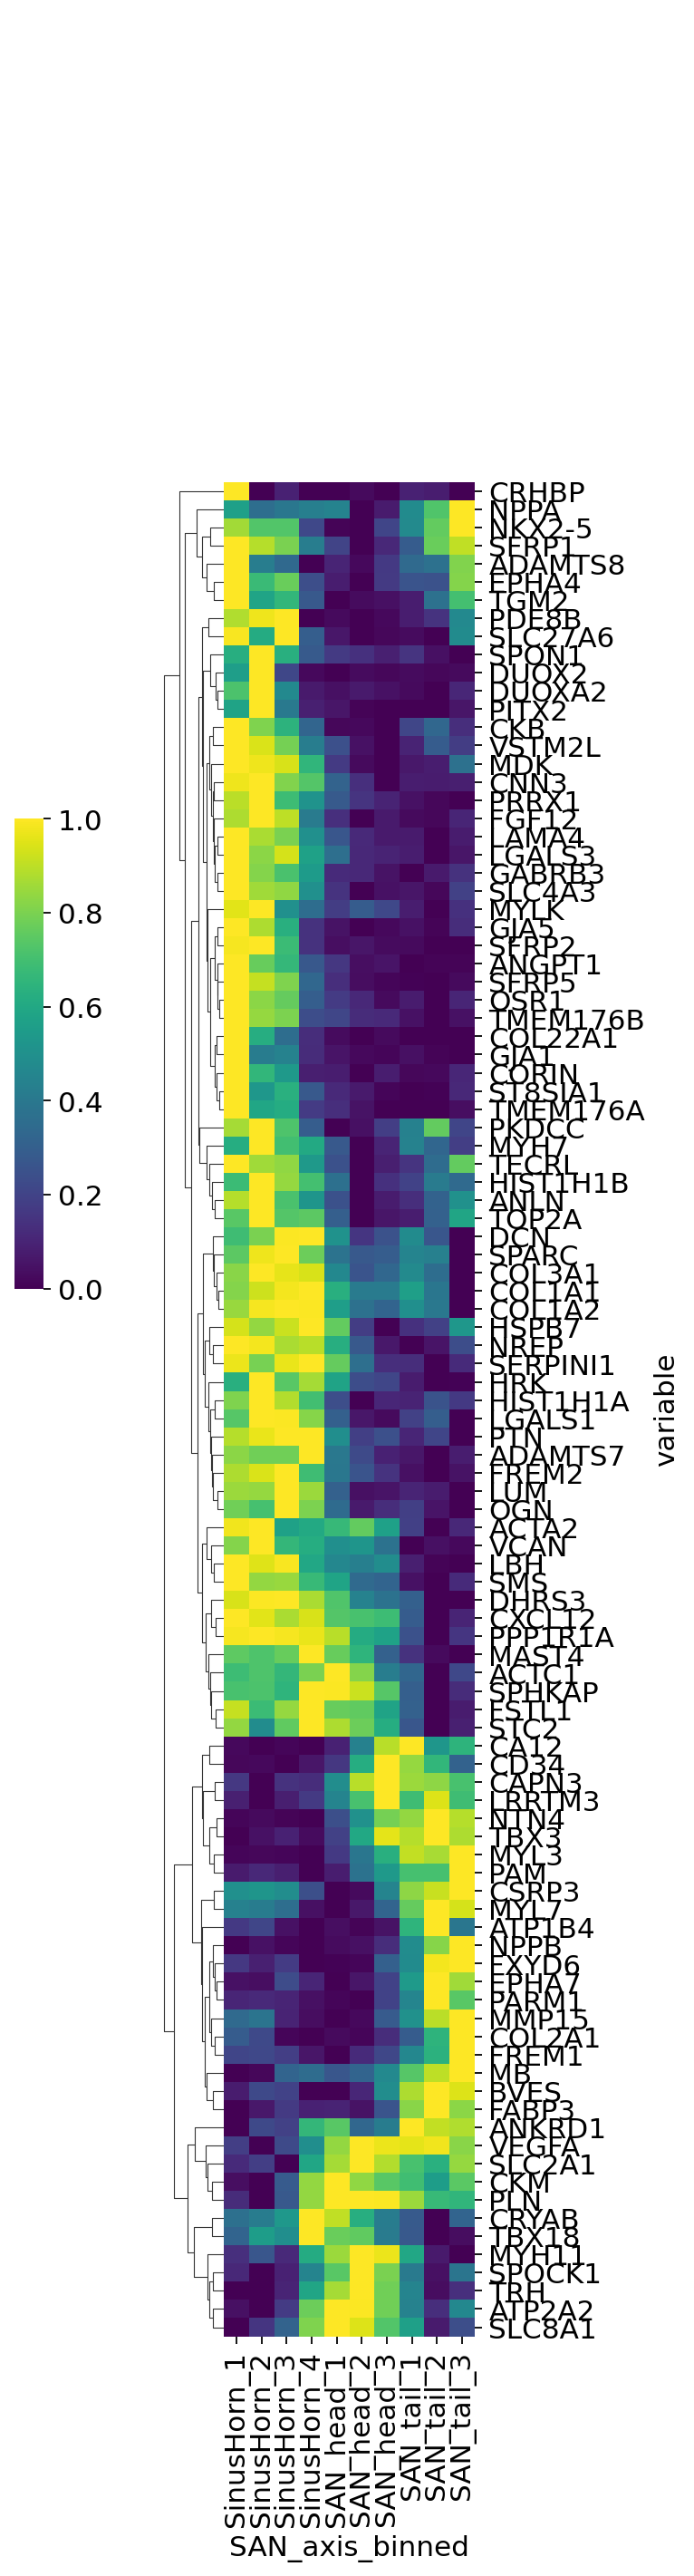

In [20]:
tissueaxis.plot_axis(adata,
              axis_col=axis_name,
              binned_col=f'{axis_name}_bin_annot',
              feature_type='gene', # 'gene' or 'celltype'
              features_to_plot=significant_genes,
              features_to_remove=None,
              threshold_express_prop=0.1, # at quantile=0.9
              threshold_cell_abundance=None, # at quantile=0.9
              correlation=False,
              min_max_scale=True,
              row_cluster=True,
              figsize=(4,18),
              cbar_pos=(-0.2, 0.5, 0.05, 0.18),
              cmap='viridis',
          xticklabels=True,
          yticklabels=True,
              title=None,
              return_feature = False,
                     # save=f'{figdir}/tm-axis_OCT_genes_{key}.pdf',
    save_dpi=300,
             )

/nfs/team205/kk18/function/python/tissueaxis.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_gene_exp_prop = df_gene_exp_bi.groupby(f'{axis_col}_binned').mean()
/nfs/team205/kk18/function/python/tissueaxis.py:134: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot = df_plot.set_index('index').groupby(['variable',f'{axis_col}_binned']).mean().reset_index()


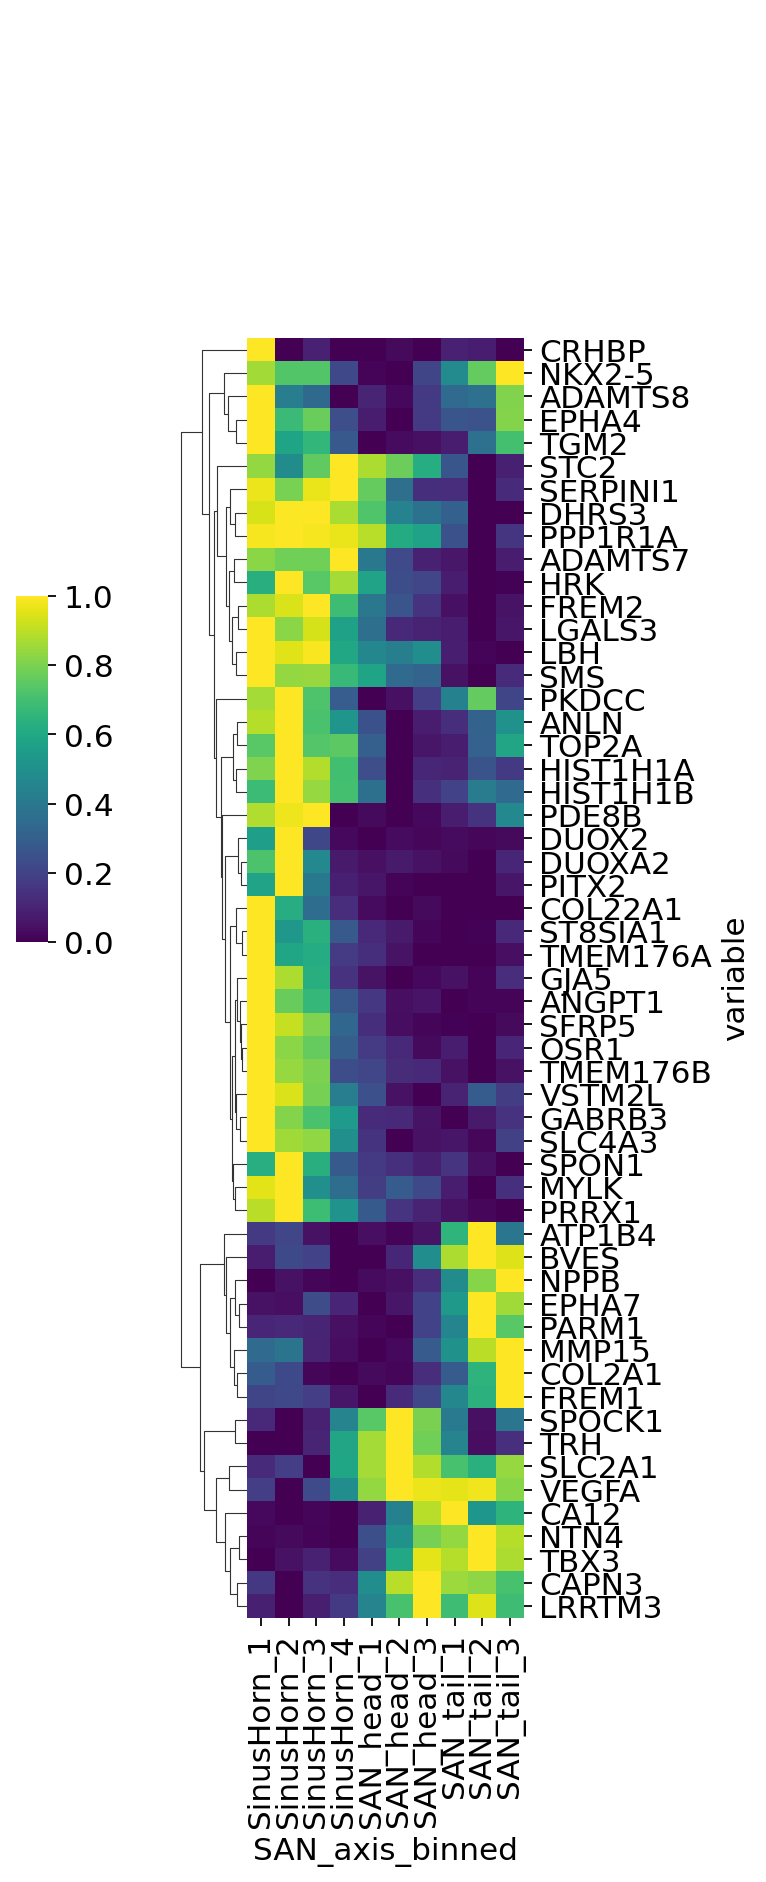

In [21]:
tissueaxis.plot_axis(adata,
              axis_col=axis_name,
              binned_col=f'{axis_name}_bin_annot',
              feature_type='gene', # 'gene' or 'celltype'
              features_to_plot=significant_genes_without_midgrain_markers,
              features_to_remove=None,
              threshold_express_prop=0.1, # at quantile=0.9
              threshold_cell_abundance=None, # at quantile=0.9
              correlation=False,
              min_max_scale=True,
              row_cluster=True,
              figsize=(4,12),
              cbar_pos=(-0.2, 0.5, 0.05, 0.18),
              cmap='viridis',
          xticklabels=True,
          yticklabels=True,
              title=None,
              return_feature = False,
                     # save=f'{figdir}/tm-axis_OCT_genes_{key}.pdf',
    save_dpi=300,
             )

In [22]:
os.getcwd()

'/nfs/team205/kk18/notebooks/Foetal/VisiumHD/re-seq_mpp0p3'

# Single-cell data: generate latent space and perform clustering

In [39]:
# HVGs, using the object which doesn't have midgrain markers
sc.pp.highly_variable_genes(adata_sc, flavor='seurat', min_mean=0.0125, max_mean=3, min_disp=0.5)
print(f'number of hvgs: {sum(adata_sc.var.highly_variable)}')
# PCA using the degected HVGs
sc.tl.pca(adata_sc, use_highly_variable=True)
# create neighbour graph
sce.pp.harmony_integrate(adata_sc, 'batch_key')
sc.pp.neighbors(adata_sc, use_rep='X_pca_harmony',n_neighbors=15)
sc.tl.umap(adata_sc, min_dist=0.5, spread=1.0)

number of hvgs: 4721


2024-12-12 16:30:53,521 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
Computing initial centroids with sklearn.KMeans...
2024-12-12 16:30:53,610 - harmonypy - INFO - sklearn.KMeans initialization complete.
sklearn.KMeans initialization complete.
2024-12-12 16:30:53,613 - harmonypy - INFO - Iteration 1 of 10
Iteration 1 of 10
2024-12-12 16:30:53,706 - harmonypy - INFO - Iteration 2 of 10
Iteration 2 of 10
2024-12-12 16:30:53,799 - harmonypy - INFO - Iteration 3 of 10
Iteration 3 of 10
2024-12-12 16:30:53,887 - harmonypy - INFO - Iteration 4 of 10
Iteration 4 of 10
2024-12-12 16:30:53,971 - harmonypy - INFO - Iteration 5 of 10
Iteration 5 of 10
2024-12-12 16:30:54,029 - harmonypy - INFO - Iteration 6 of 10
Iteration 6 of 10
2024-12-12 16:30:54,081 - harmonypy - INFO - Iteration 7 of 10
Iteration 7 of 10
2024-12-12 16:30:54,172 - harmonypy - INFO - Iteration 8 of 10
Iteration 8 of 10
2024-12-12 16:30:54,325 - harmonypy - INFO - Iteration 9 of 10
Iteration 9 of 10

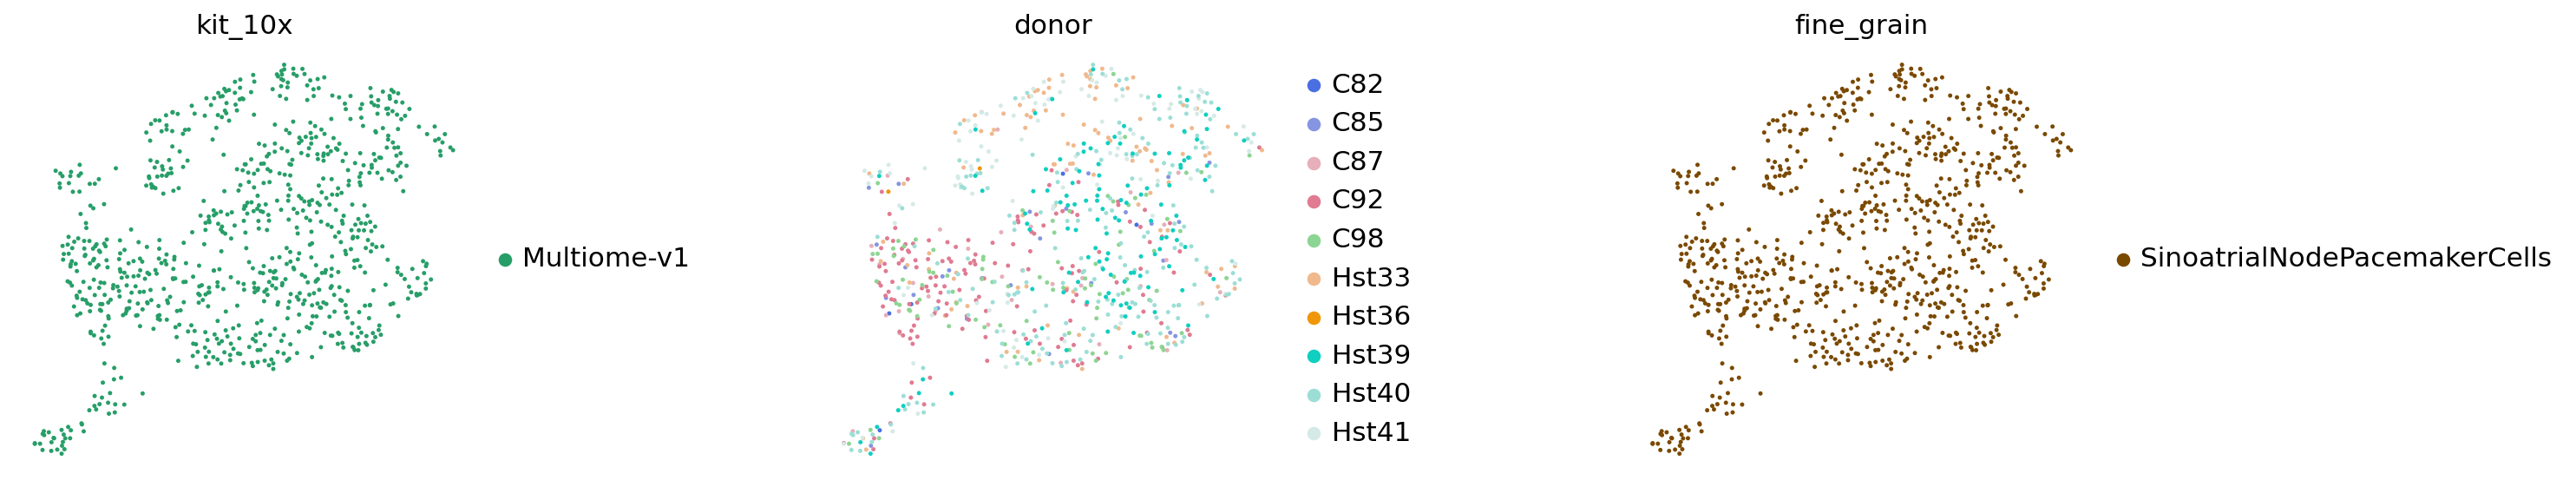

In [40]:
sc.pl.embedding(adata_sc, basis='umap',
                    color=['kit_10x','donor','fine_grain'],
               size=20, wspace=0.6, frameon=False,legend_fontsize=14)

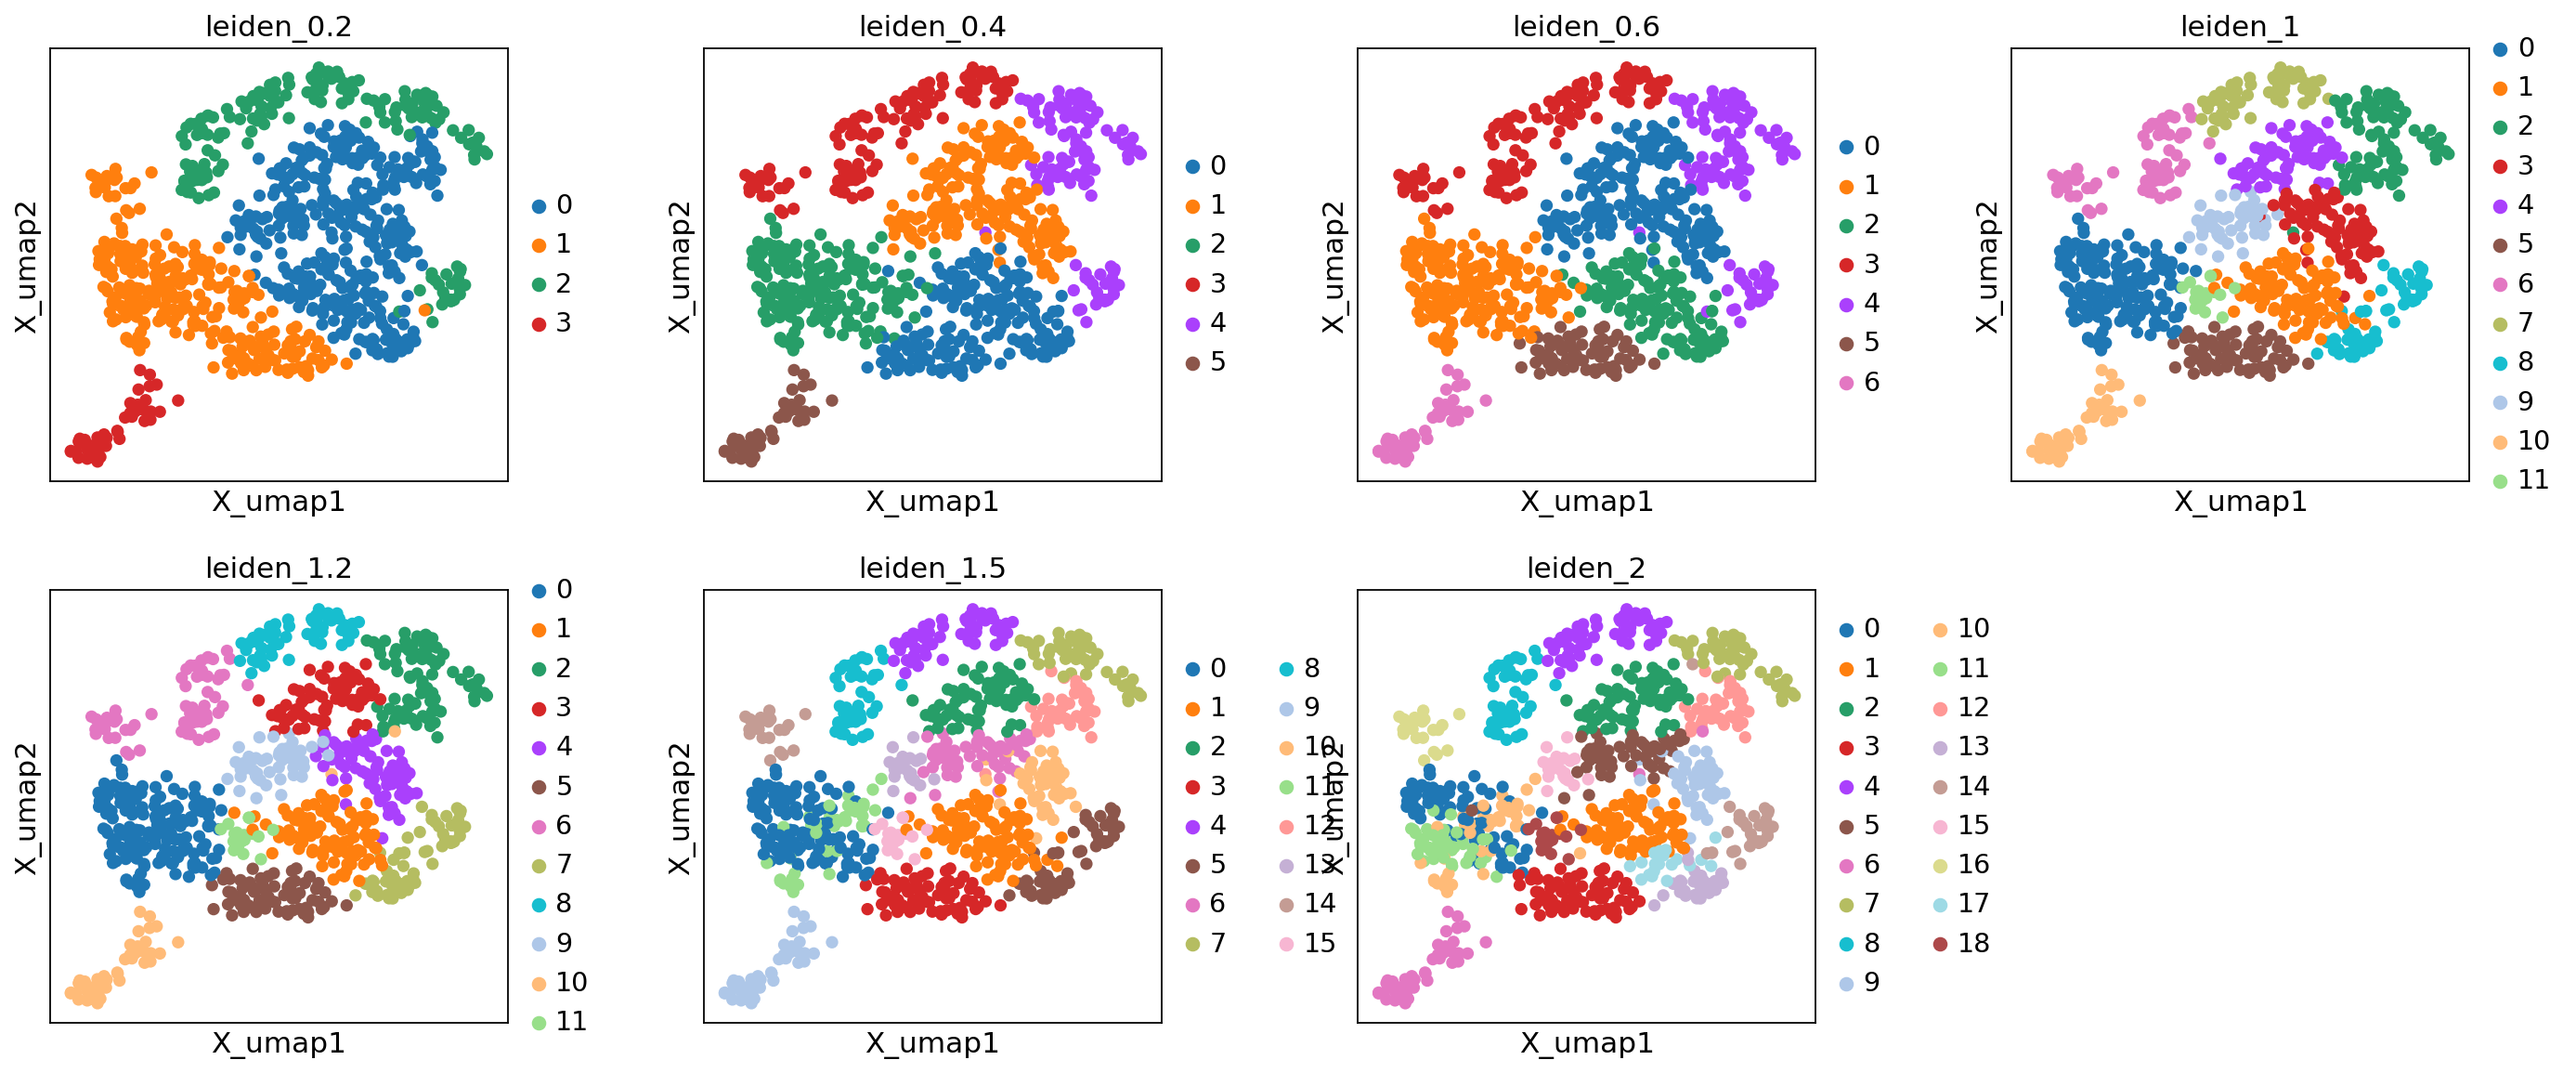

In [41]:
# leiden clustering
resolutions_list = [0.2,0.4,0.6,1,1.2,1.5,2]
for resolution in resolutions_list:
    sc.tl.leiden(adata_sc,resolution=resolution,key_added=f'leiden_{str(resolution)}',n_iterations=2)
sc.pl.embedding(adata_sc,basis='X_umap',
                color=[f'leiden_{str(resolution)}' for resolution in resolutions_list],
                wspace=0.3)

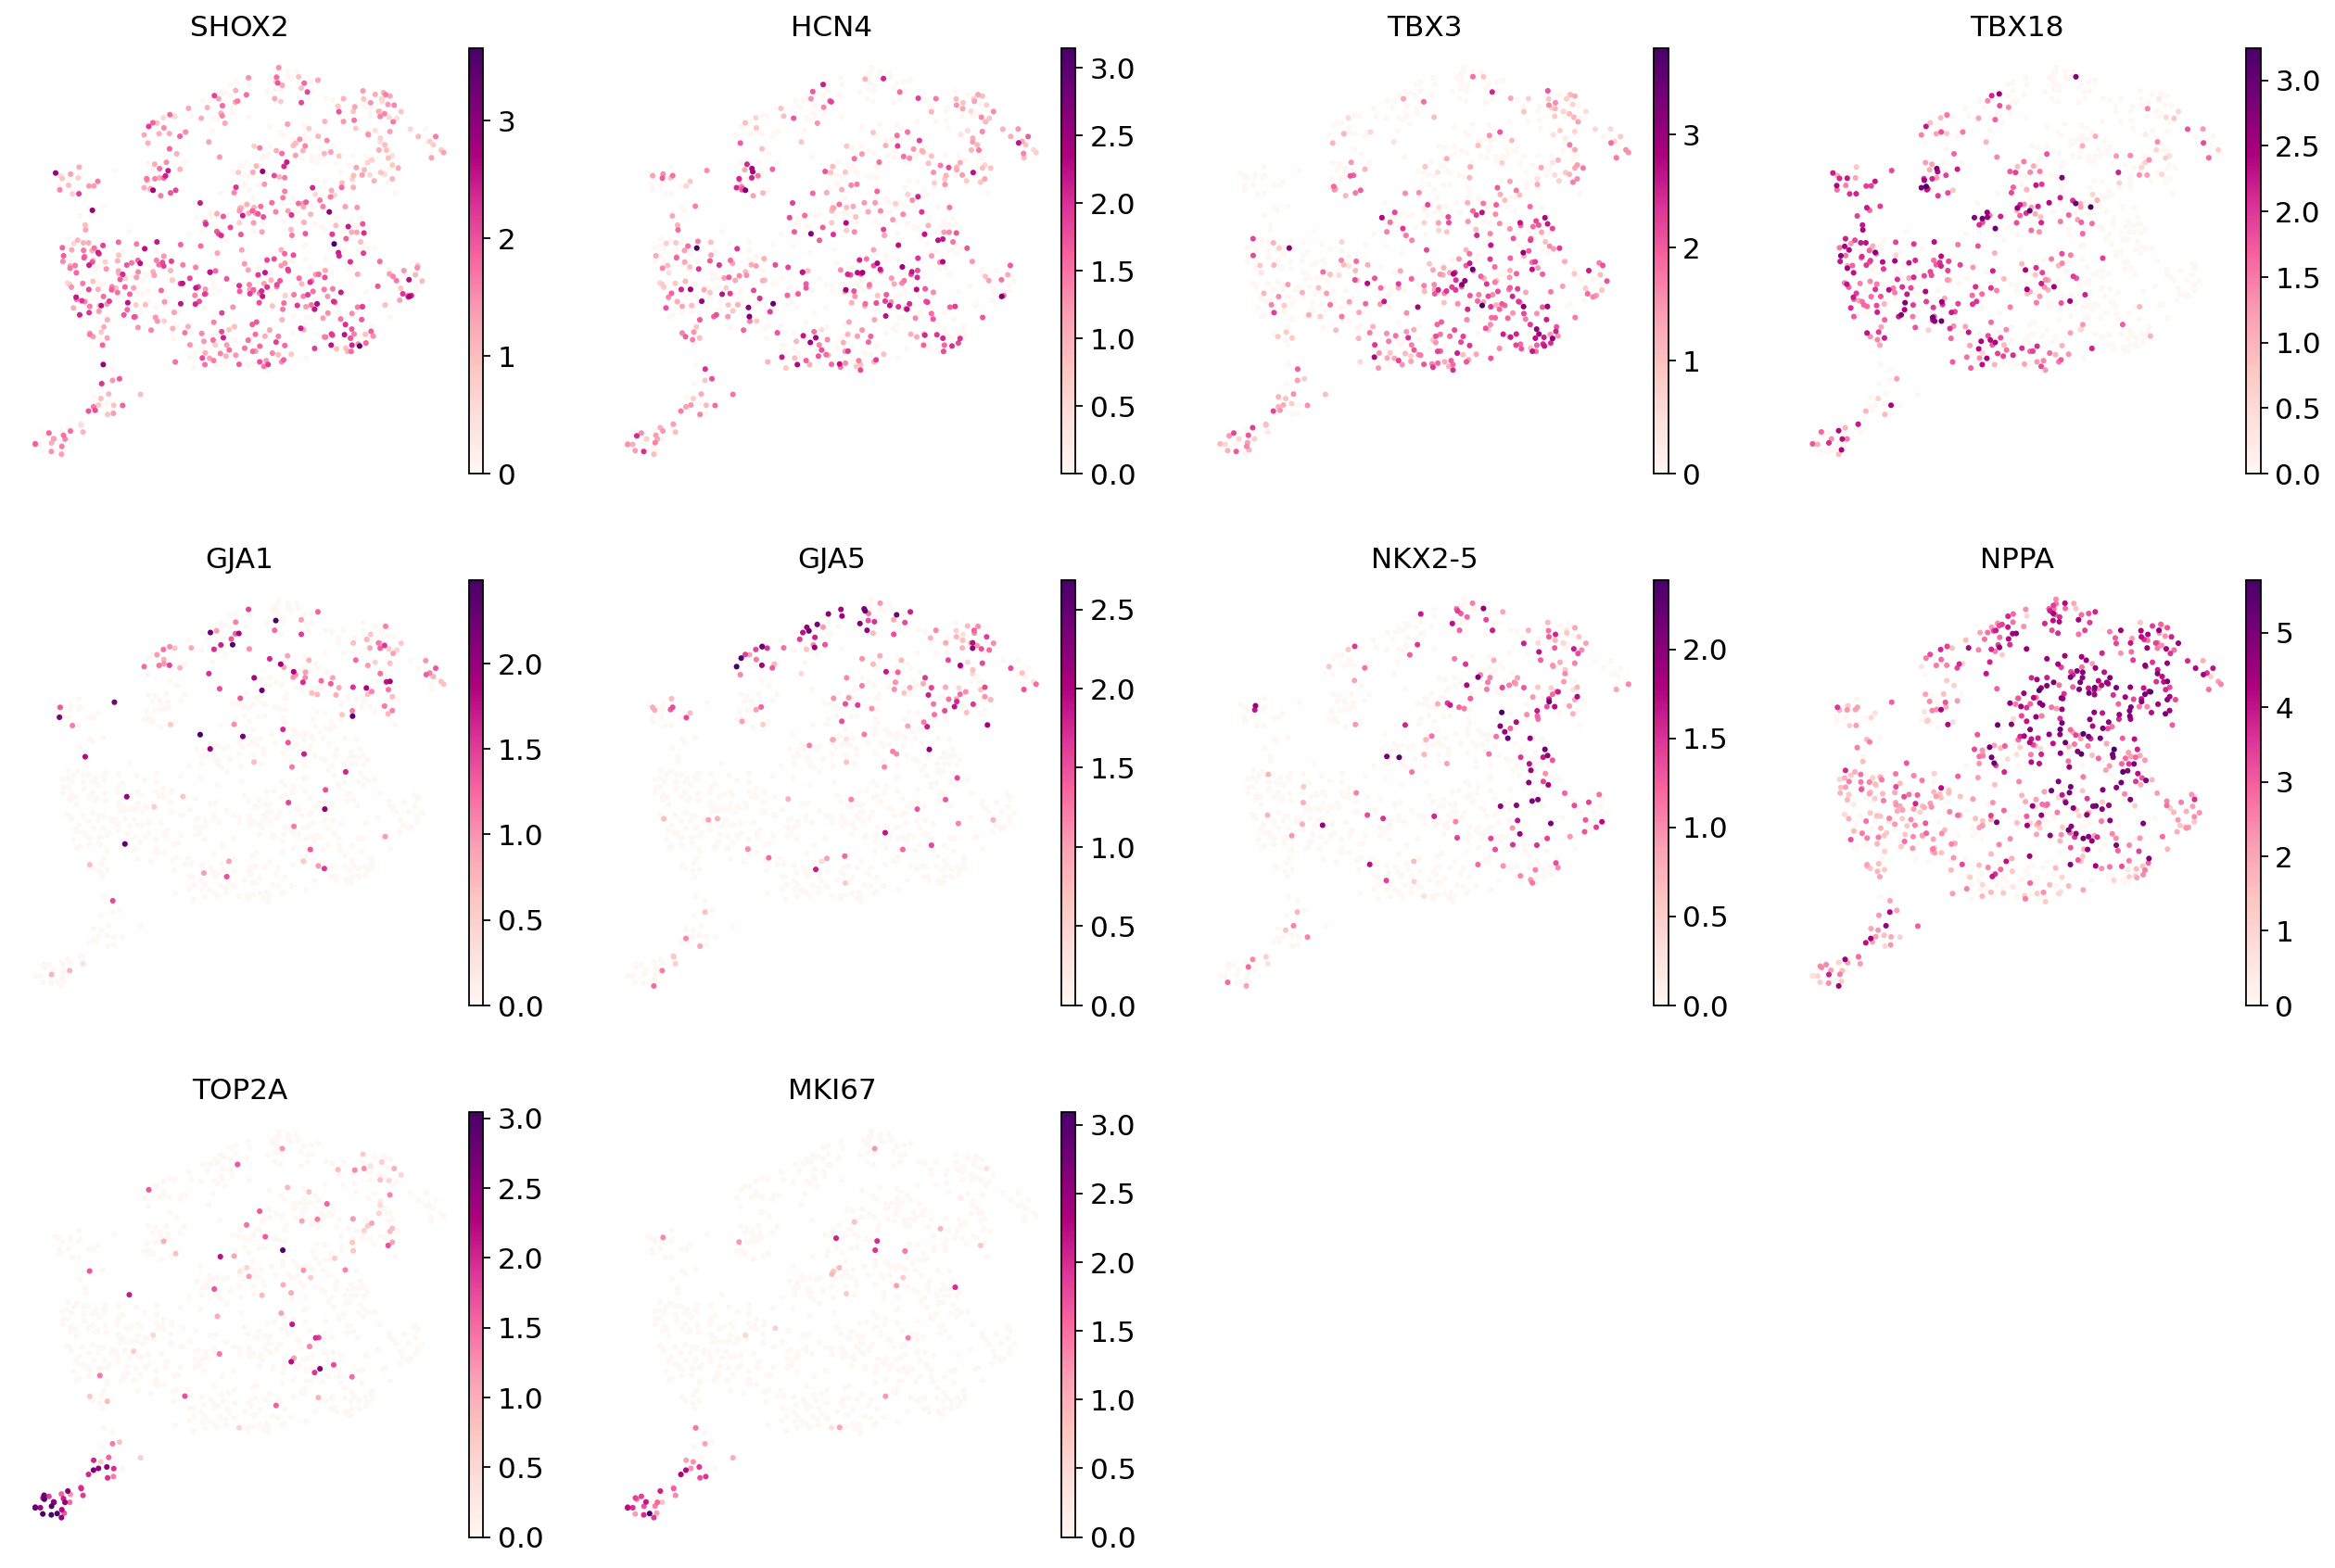

In [42]:
genes = ['SHOX2','HCN4','TBX3','TBX18',
         'GJA1', # CX43
         'GJA5', # CX40
         'NKX2-5',
         'NPPA',
         'TOP2A','MKI67'
        ]

sc.pl.embedding(adata_sc, basis='umap',
                        color=genes,
                   size=30, wspace=0.2, frameon=False,cmap='RdPu')

In [43]:
leiden_res_sel = 1

# CellTypist model training

In [30]:
import celltypist

Gene features to use:<br>
    - all genes<br>
    - HVGs<br>
    - axis genes: with or without midgrain cell type markers

In [31]:
sc.pp.highly_variable_genes(adata, flavor='seurat', min_mean=0.0125, max_mean=3, min_disp=0.5)
print(f'number of hvgs: {sum(adata.var.highly_variable)}')
hvgs = adata.var_names[adata.var.highly_variable]
hvgs[:5]

number of hvgs: 3600


Index(['HES4', 'ISG15', 'C1orf159', 'ACAP3', 'INTS11'], dtype='object')

In [32]:
features = {}
features['all'] = list(adata.var_names)
features['hvg'] = hvgs
features['axis_gene'] = significant_genes
features['axis_gene_wo_midmarkers'] = significant_genes_without_midgrain_markers

In [80]:
for key,value in features.items():
    print(key)
    model = celltypist.train(adata[:,value],  # selecting features
                         labels = celltype_key,
                         n_jobs = 10,
                         feature_selection = False, # since manually selected
                         check_expression = False
                        )
    # Save the model
    model.write(f'/nfs/team205/kk18/notebooks/Foetal/VisiumHD/re-seq_mpp0p3/celltypist/model_HD-SANPC_{key}.pkl')

🍳 Preparing data before training


all


🔬 Input data has 1510 cells and 14912 genes
⚖️ Scaling input data
🏋️ Training data using logistic regression
✅ Model training done!
🍳 Preparing data before training


hvg


🔬 Input data has 1510 cells and 3600 genes
⚖️ Scaling input data
🏋️ Training data using logistic regression
✅ Model training done!
🍳 Preparing data before training


axis_gene


🔬 Input data has 1510 cells and 102 genes
⚖️ Scaling input data
🏋️ Training data using logistic regression
✅ Model training done!
🍳 Preparing data before training


axis_gene_wo_midmarkers


🔬 Input data has 1510 cells and 55 genes
⚖️ Scaling input data
🏋️ Training data using logistic regression
✅ Model training done!


In [81]:
os.getcwd()

'/nfs/team205/kk18/notebooks/Foetal/VisiumHD/re-seq_mpp0p3'

# CellTypist - Predict

In [28]:
adata_sc.X.data[:5]

array([2.1097739, 1.2283119, 1.2283119, 2.3666706, 1.2283119],
      dtype=float32)

⚠️ Warning: invalid expression matrix, expect ALL genes and log1p normalized expression to 10000 counts per cell. The prediction result may not be accurate
🔬 Input data has 833 cells and 19057 genes
🔗 Matching reference genes in the model


all


🧬 13037 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
⚠️ Warning: invalid expression matrix, expect ALL genes and log1p normalized expression to 10000 counts per cell. The prediction result may not be accurate
🔬 Input data has 833 cells and 19057 genes
🔗 Matching reference genes in the model


hvg


🧬 3177 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
⚠️ Warning: invalid expression matrix, expect ALL genes and log1p normalized expression to 10000 counts per cell. The prediction result may not be accurate
🔬 Input data has 833 cells and 19057 genes
🔗 Matching reference genes in the model


axis_gene


🧬 101 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
⚠️ Warning: invalid expression matrix, expect ALL genes and log1p normalized expression to 10000 counts per cell. The prediction result may not be accurate
🔬 Input data has 833 cells and 19057 genes
🔗 Matching reference genes in the model
🧬 54 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


axis_gene_wo_midmarkers


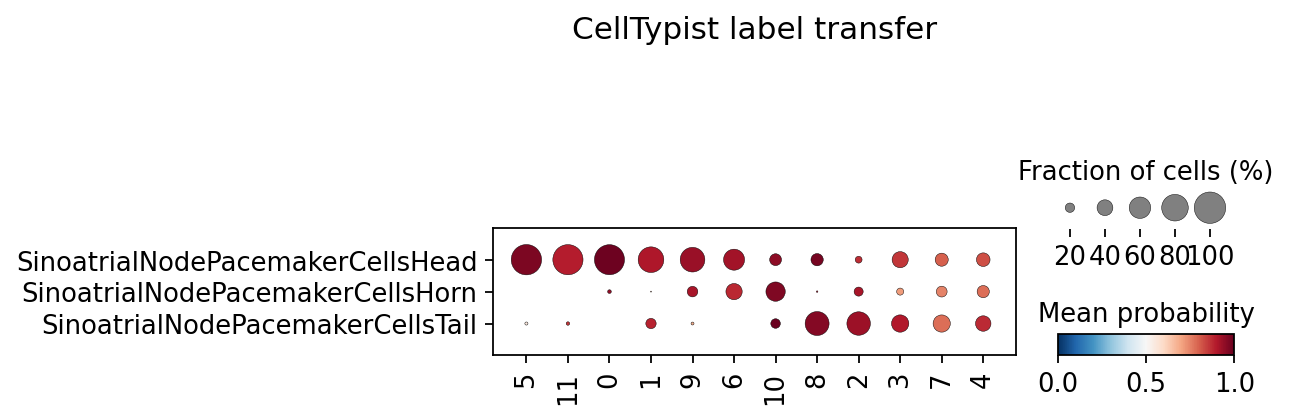

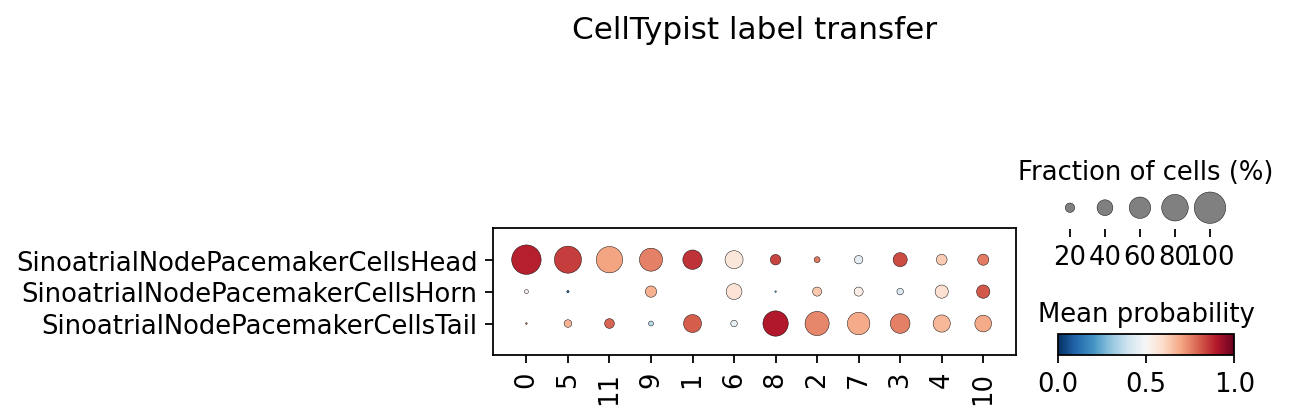

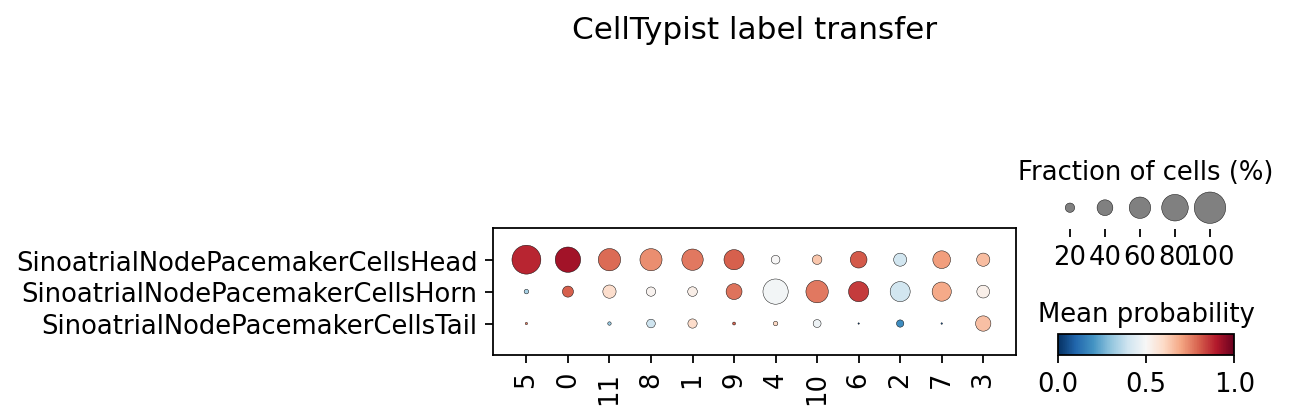

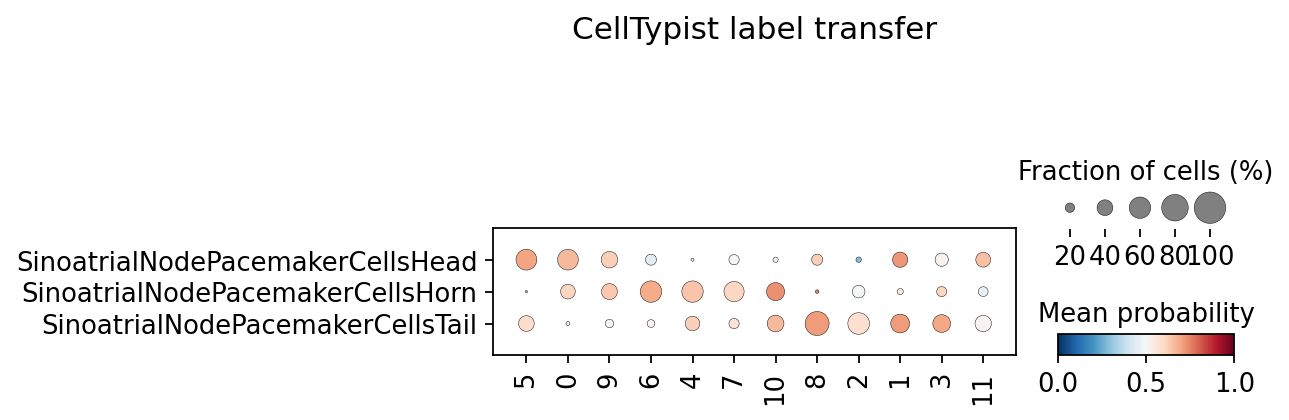

In [47]:
for key in features.keys():
    print(key)
    predictions = celltypist.annotate(adata_sc, 
                                      model = f'/nfs/team205/kk18/notebooks/Foetal/VisiumHD/re-seq_mpp0p3/celltypist/model_HD-SANPC_{key}.pkl', 
                                      majority_voting = False)
    # plot
    celltypist.dotplot(predictions, use_as_reference = f'leiden_{str(leiden_res_sel)}', use_as_prediction = 'predicted_labels', vmax=1, show=False)
    # add to anndata
    adata_sc = predictions.to_adata(insert_labels = True, insert_conf = True)
    adata_sc.obs.rename(columns={
        'predicted_labels':f'celltypist_prediction_{key}',
        'conf_score':f'celltypist_conf_score_{key}'
    },inplace=True)

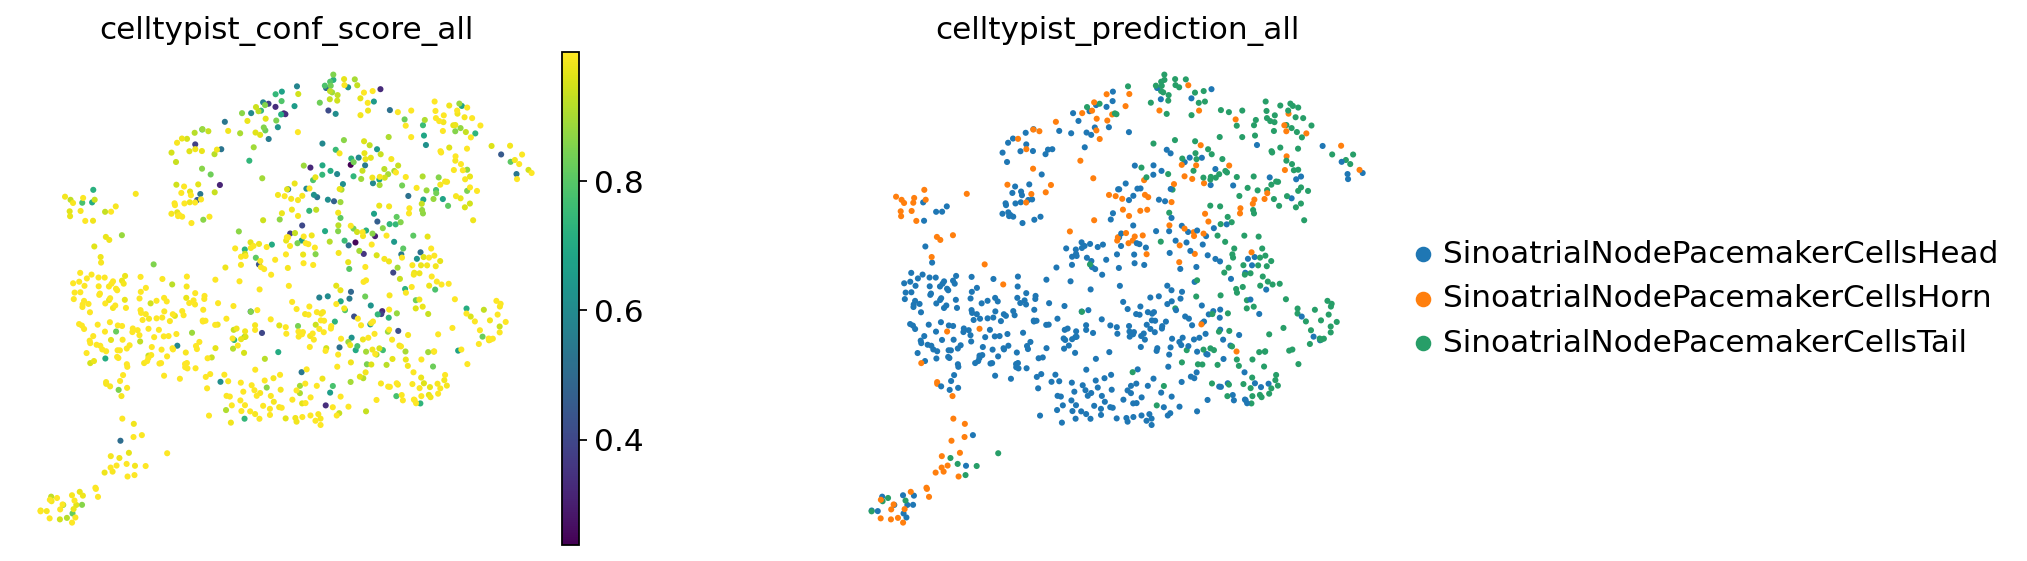

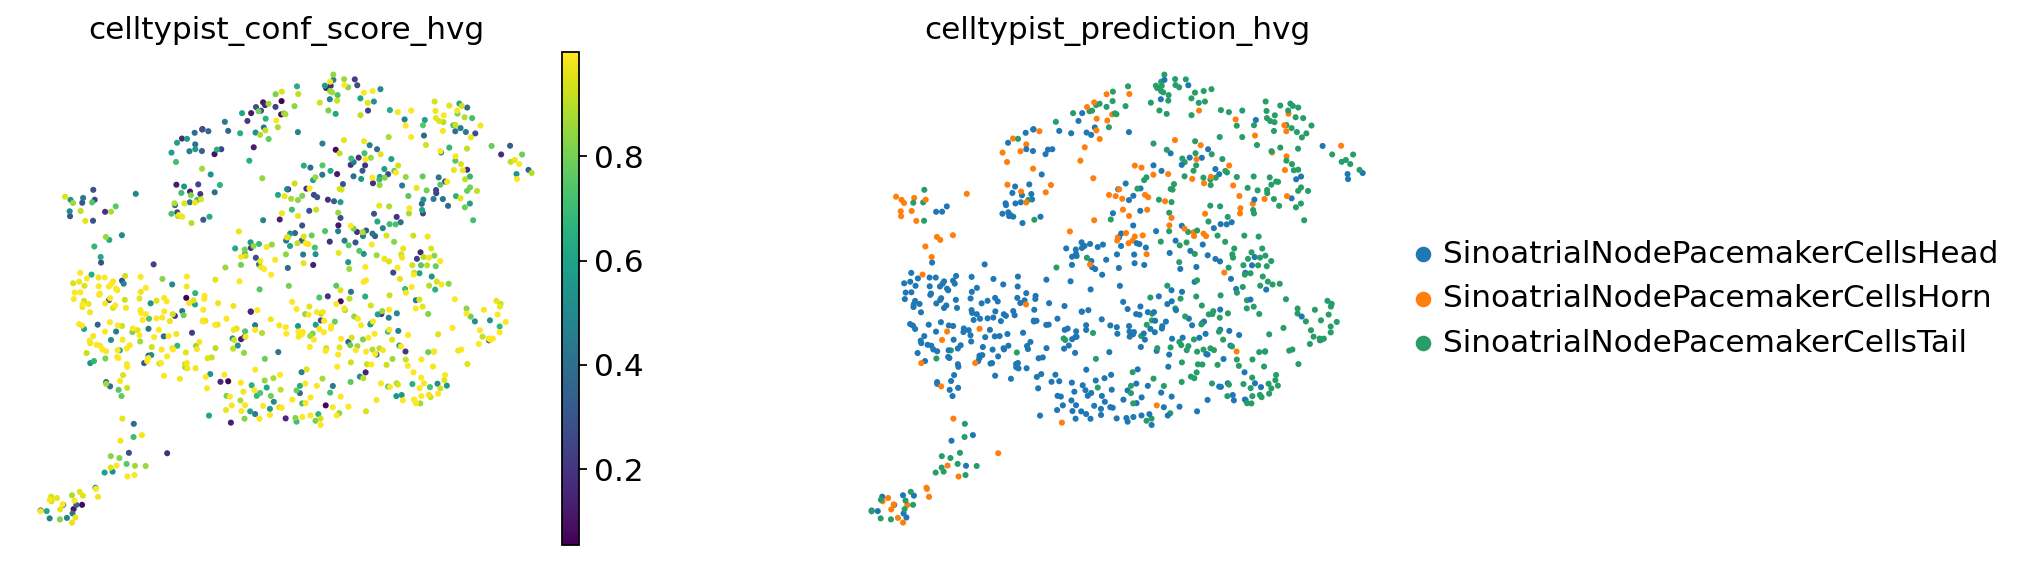

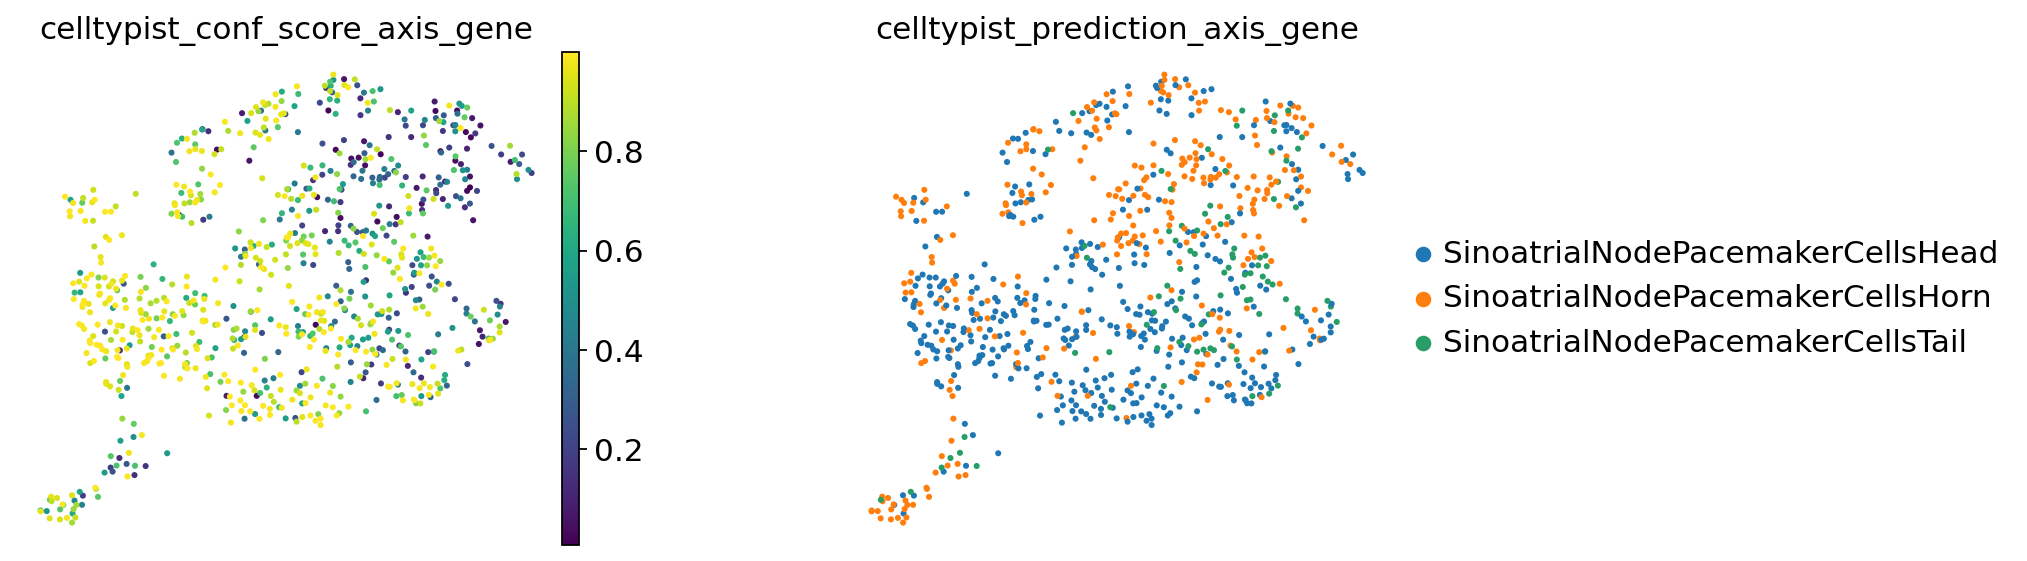

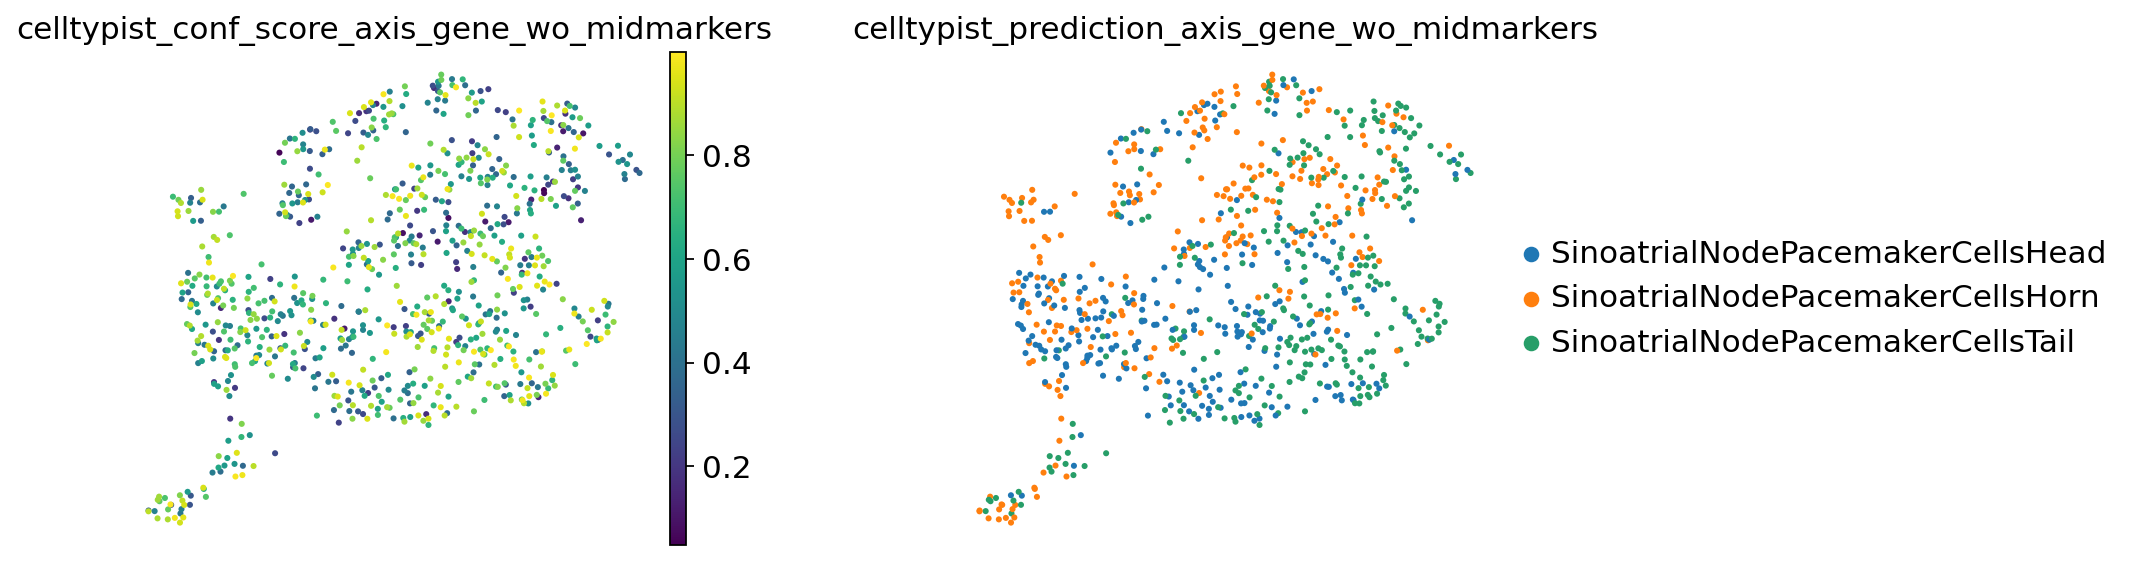

In [48]:
for key in features.keys():
    # plot on umap
    sc.pl.embedding(adata_sc, basis='umap',
                        color=[f'celltypist_conf_score_{key}',f'celltypist_prediction_{key}'],
                   size=30, wspace=0.4, frameon=False,legend_fontsize=14)

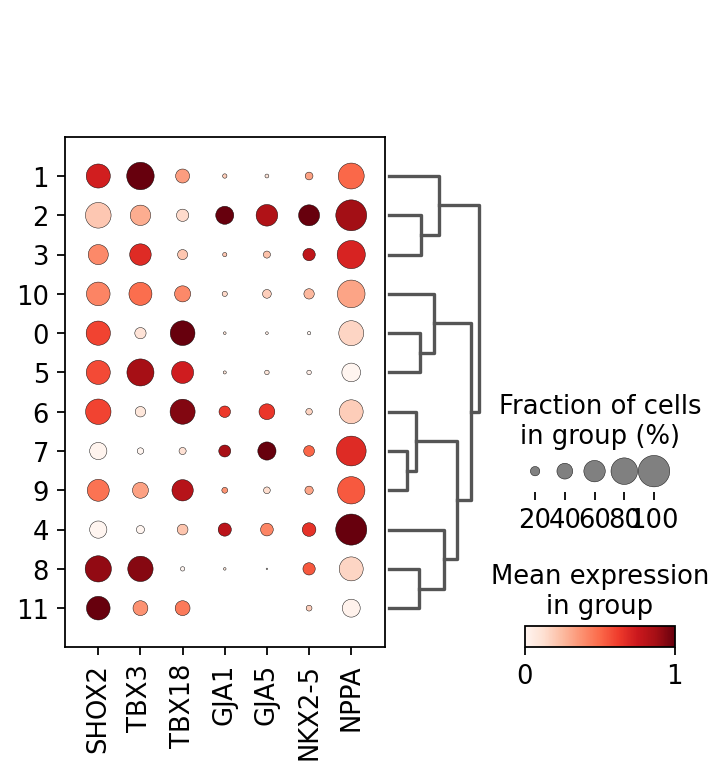

In [49]:
genes = ['SHOX2',
    'TBX3','TBX18',
         'GJA1', # CX43
         'GJA5', # CX40
         'NKX2-5','NPPA']
genes = [x for x in genes if x in adata_sc.var_names]
sc.pl.dotplot(adata_sc,
              var_names=genes,
              groupby=f'leiden_{str(leiden_res_sel)}',
              standard_scale='var',
              dendrogram=True
             )

[2.1097739 1.2283119 1.2283119 2.3666706 1.2283119]


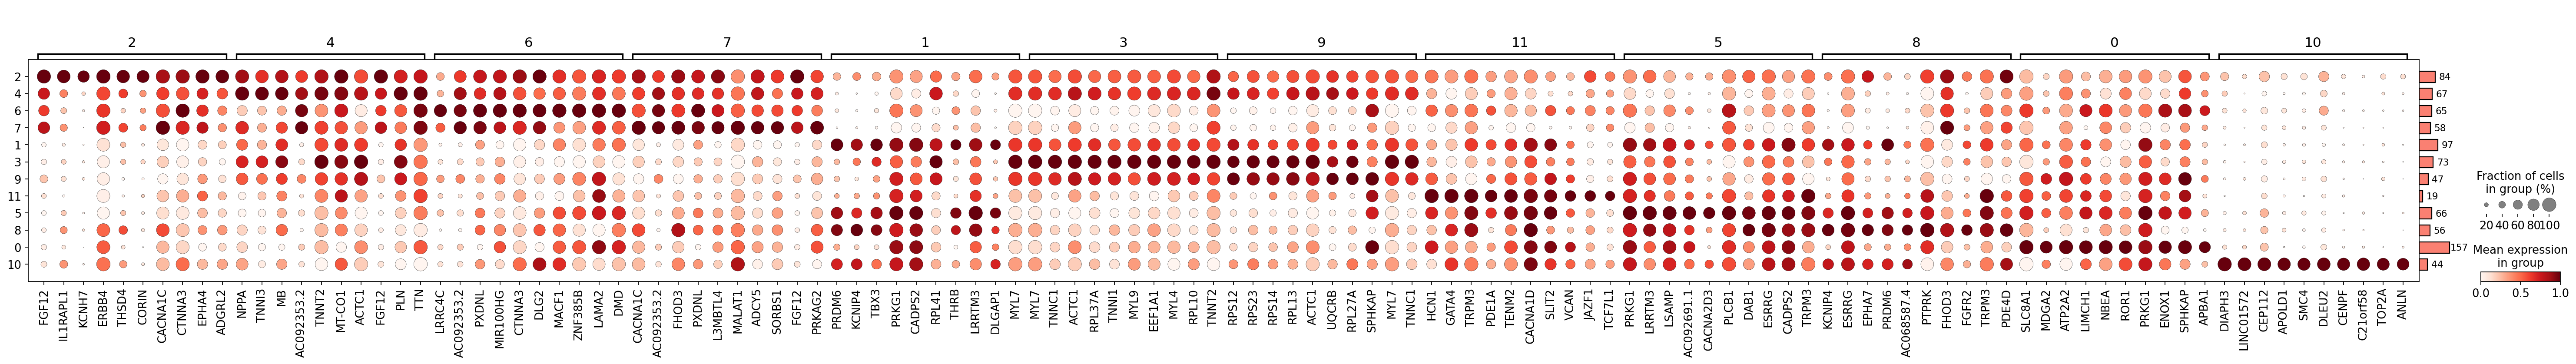

In [50]:
# DEG analysis
print(adata_sc.X.data[:5])
adata_sc.uns['log1p']['base']=None
sc.tl.rank_genes_groups(adata_sc,groupby=f'leiden_{str(leiden_res_sel)}')
sc.tl.dendrogram(adata_sc, groupby=f'leiden_{str(leiden_res_sel)}')
dp=sc.pl.rank_genes_groups_dotplot(adata_sc, dendrogram=True, standard_scale='var', return_fig=True)
dp.add_totals().show()

In [51]:
leiden_res_sel

1

# Manually annotate cycling cells and transitional cells

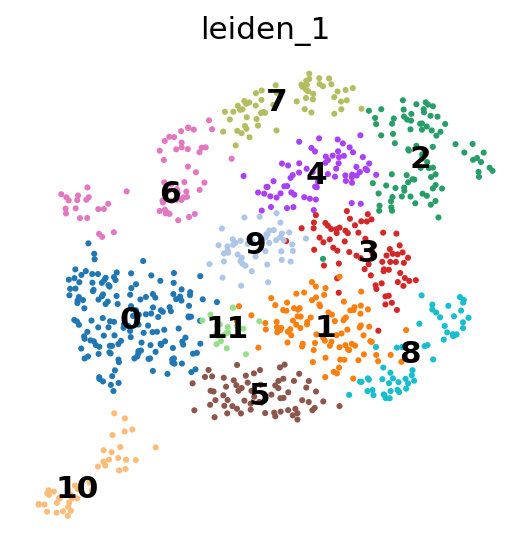

In [52]:
sc.pl.embedding(adata_sc, basis='umap',
                        color=[f'leiden_{str(leiden_res_sel)}'],legend_loc='on data',
                   size=30, wspace=0.4, frameon=False,legend_fontsize=14)

In [53]:
# annotate
adata_sc.obs['SANPC_subpopulations'] = adata_sc.obs[f'leiden_{str(leiden_res_sel)}'].copy()
adata_sc.obs.replace({'SANPC_subpopulations':{
    '0':'SinoatrialNodePacemakerCellsHead',
    '1':'SinoatrialNodePacemakerCellsTail',
    '2':'SinoatrialNodeTransitionalCells',
    '3':'SinoatrialNodePacemakerCellsTail',
    '4':'SinoatrialNodeTransitionalCells',
    '5':'SinoatrialNodePacemakerCellsHead',
    '6':'SinoatrialNodePacemakerCellsHorn',
    '7':'SinoatrialNodeTransitionalCells',
    '8':'SinoatrialNodePacemakerCellsTail',
    '9':'SinoatrialNodePacemakerCellsHead',
    '10':'SinoatrialNodePacemakerCellsCycling',
    '11':'SinoatrialNodePacemakerCellsHead'
}},inplace=True)
adata_sc.obs['SANPC_subpopulations'].value_counts()

SANPC_subpopulations
SinoatrialNodePacemakerCellsHead       289
SinoatrialNodePacemakerCellsTail       226
SinoatrialNodeTransitionalCells        209
SinoatrialNodePacemakerCellsHorn        65
SinoatrialNodePacemakerCellsCycling     44
Name: count, dtype: int64

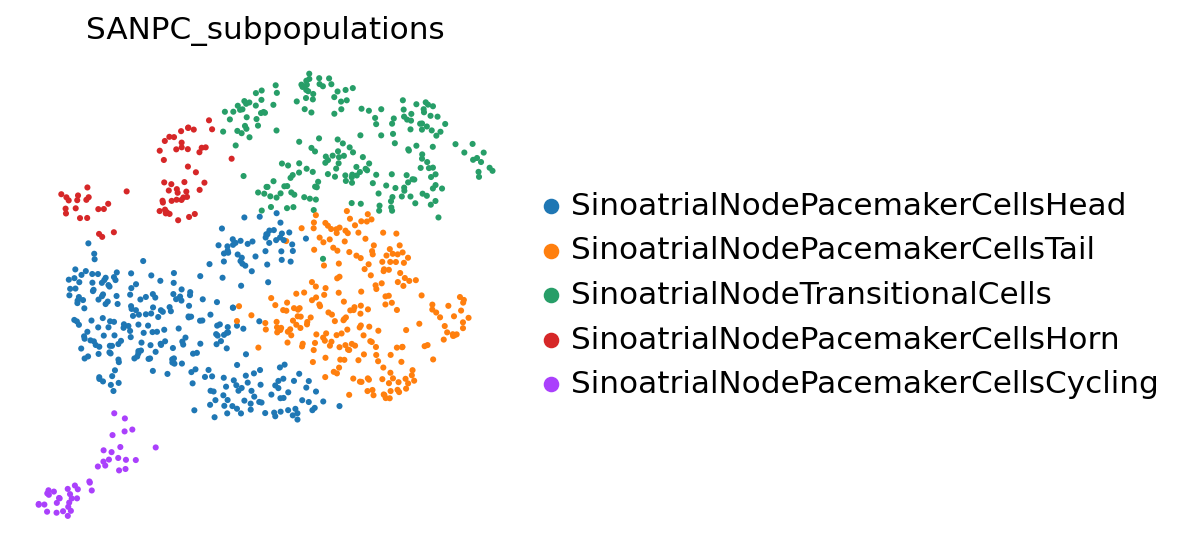

In [54]:
sc.pl.embedding(adata_sc, basis='umap',
                        color=['SANPC_subpopulations'],
                   size=30, wspace=0.4, frameon=False,legend_fontsize=14)

⚠️ Warning: invalid expression matrix, expect ALL genes and log1p normalized expression to 10000 counts per cell. The prediction result may not be accurate
🔬 Input data has 833 cells and 19057 genes
🔗 Matching reference genes in the model


all


🧬 13037 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
⚠️ Warning: invalid expression matrix, expect ALL genes and log1p normalized expression to 10000 counts per cell. The prediction result may not be accurate
🔬 Input data has 833 cells and 19057 genes
🔗 Matching reference genes in the model


hvg


🧬 3177 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
⚠️ Warning: invalid expression matrix, expect ALL genes and log1p normalized expression to 10000 counts per cell. The prediction result may not be accurate
🔬 Input data has 833 cells and 19057 genes
🔗 Matching reference genes in the model
🧬 101 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


axis_gene
axis_gene_wo_midmarkers


⚠️ Warning: invalid expression matrix, expect ALL genes and log1p normalized expression to 10000 counts per cell. The prediction result may not be accurate
🔬 Input data has 833 cells and 19057 genes
🔗 Matching reference genes in the model
🧬 54 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


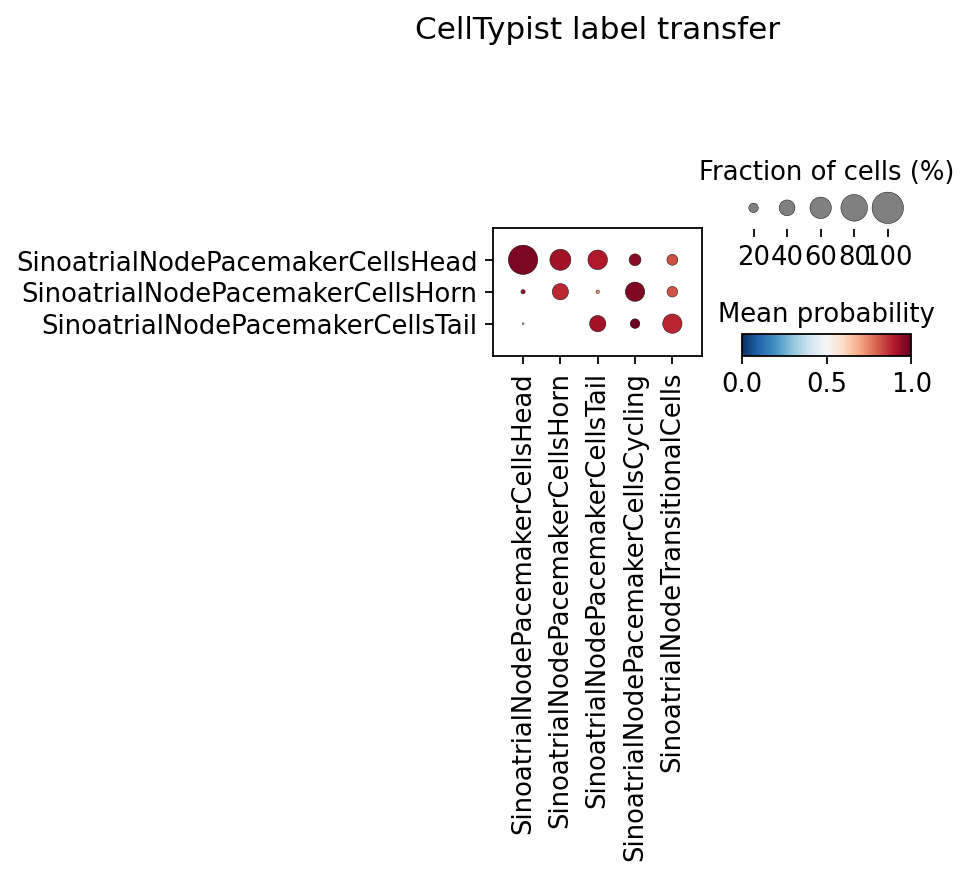

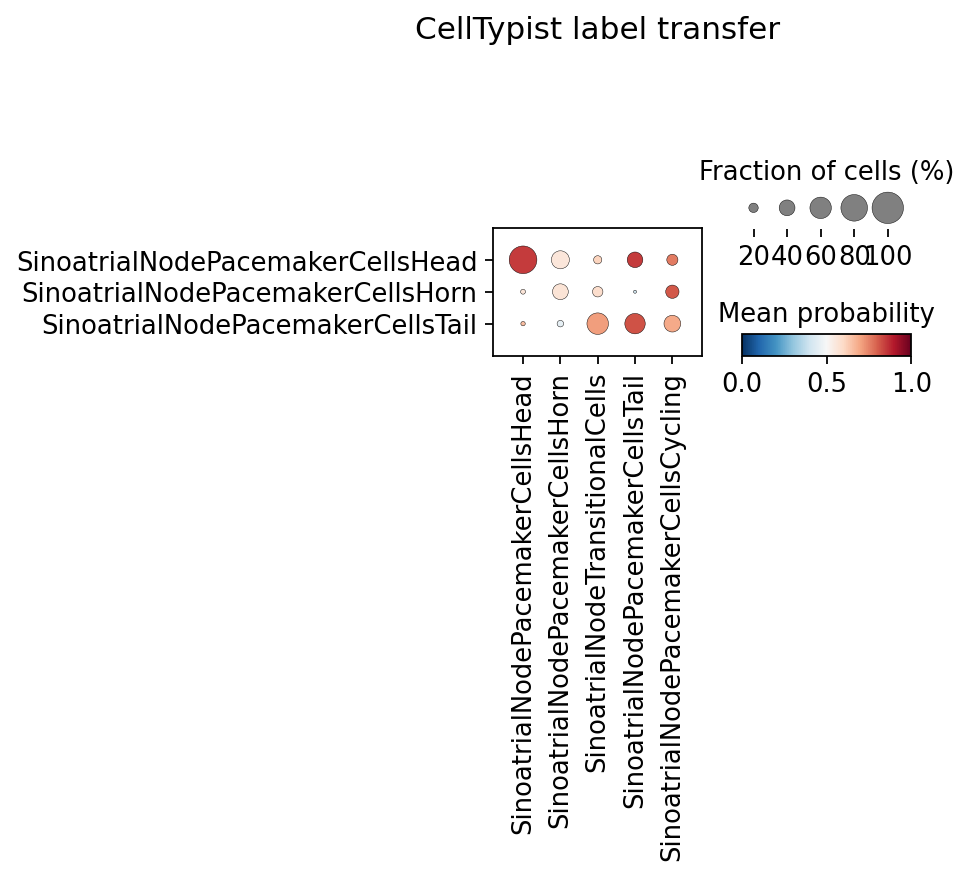

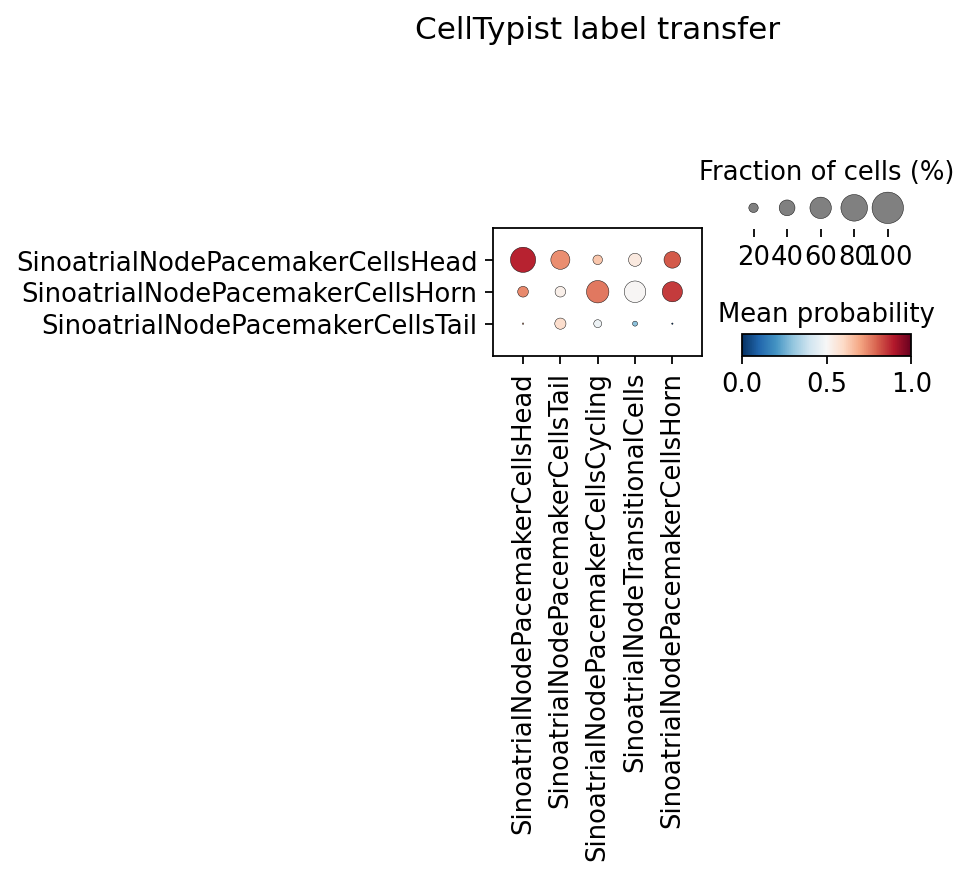

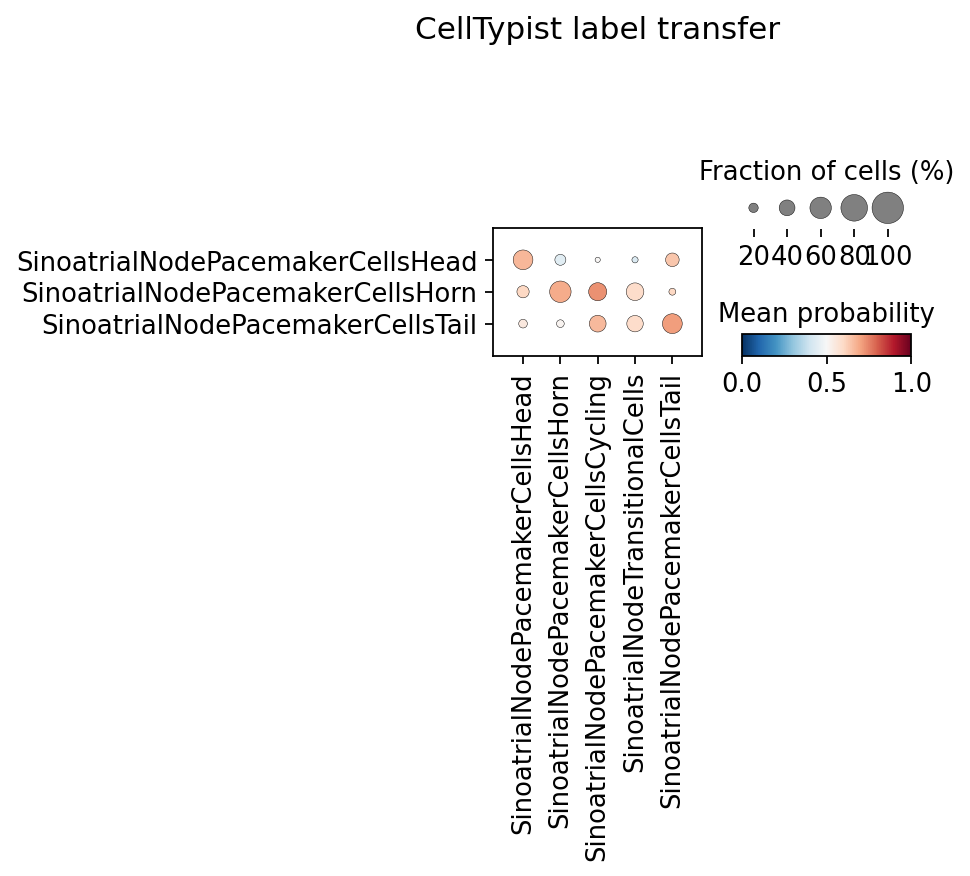

In [55]:
for key in features.keys():
    print(key)
    predictions = celltypist.annotate(adata_sc, 
                                      model = f'/nfs/team205/kk18/notebooks/Foetal/VisiumHD/re-seq_mpp0p3/celltypist/model_HD-SANPC_{key}.pkl', 
                                      majority_voting = False)
    # plot
    celltypist.dotplot(predictions, use_as_reference = 'SANPC_subpopulations', use_as_prediction = 'predicted_labels', vmax=1, show=False)

# Clustering-based vs CellTypist-based, which is better?

In [61]:
# remove cycling clusters
adata_sc_sel = adata_sc[adata_sc.obs['SANPC_subpopulations'].isin(['SinoatrialNodePacemakerCellsCycling'])==False]
adata_sc_sel.obs['SANPC_subpopulations'].value_counts()

SANPC_subpopulations
SinoatrialNodePacemakerCellsHead    289
SinoatrialNodePacemakerCellsTail    226
SinoatrialNodeTransitionalCells     209
SinoatrialNodePacemakerCellsHorn     65
Name: count, dtype: int64

In [58]:
# markers for assessing
genes = ['SHOX2',
    'TBX3','TBX18',
         'GJA1', # CX43
         'GJA5', # CX40
         'NKX2-5',# 'NPPA'
        ]
genes = [x for x in genes if x in adata_sc.var_names]

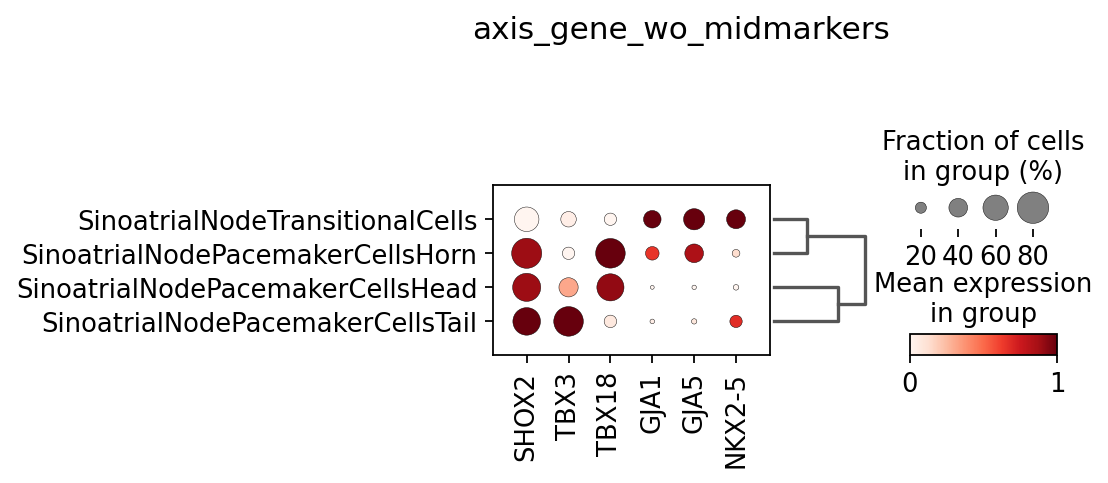

In [59]:
# clustering based annotation
sc.pl.dotplot(adata_sc_sel,
                  var_names=genes,
                  groupby='SANPC_subpopulations',
                  standard_scale='var',
                  dendrogram=True,
                  title=key
                 )

all
tmp_annotation
SinoatrialNodePacemakerCellsHead    405
SinoatrialNodeTransitionalCells     183
SinoatrialNodePacemakerCellsTail     93
SinoatrialNodePacemakerCellsHorn     52
Name: count, dtype: int64


... storing 'tmp_annotation' as categorical


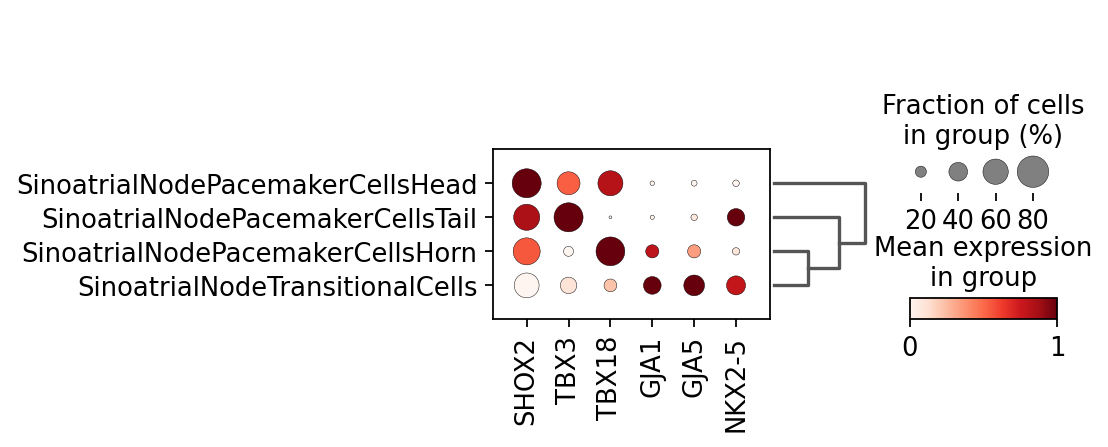

... storing 'tmp_annotation' as categorical


hvg
tmp_annotation
SinoatrialNodePacemakerCellsHead    296
SinoatrialNodeTransitionalCells     130
SinoatrialNodePacemakerCellsTail    117
SinoatrialNodePacemakerCellsHorn     23
Name: count, dtype: int64


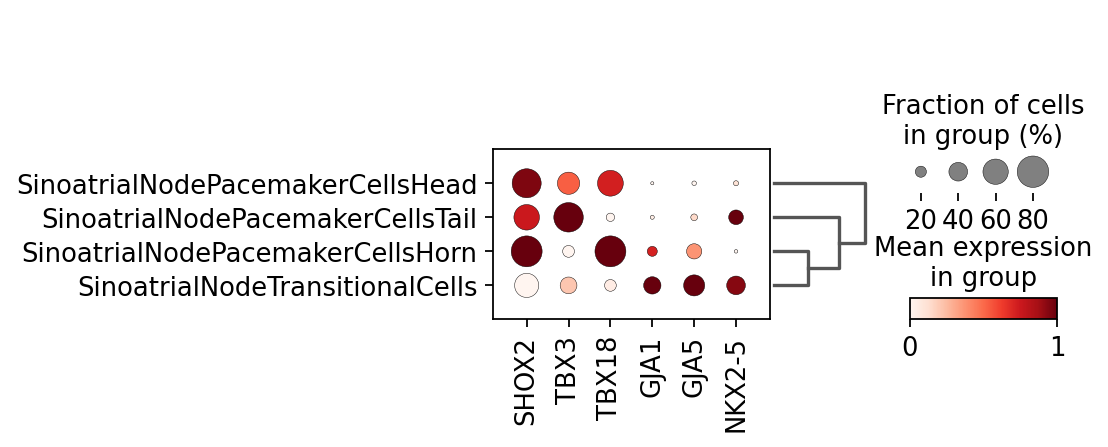

... storing 'tmp_annotation' as categorical


axis_gene
tmp_annotation
SinoatrialNodePacemakerCellsHead    302
SinoatrialNodePacemakerCellsHorn    100
SinoatrialNodeTransitionalCells      85
SinoatrialNodePacemakerCellsTail     29
Name: count, dtype: int64


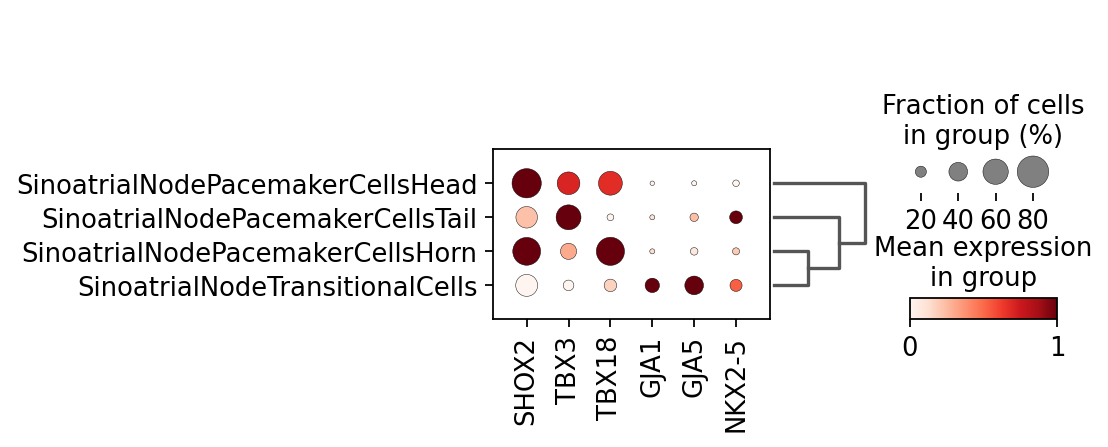

... storing 'tmp_annotation' as categorical


axis_gene_wo_midmarkers
tmp_annotation
SinoatrialNodePacemakerCellsHead    144
SinoatrialNodePacemakerCellsTail    115
SinoatrialNodeTransitionalCells      95
SinoatrialNodePacemakerCellsHorn     80
Name: count, dtype: int64


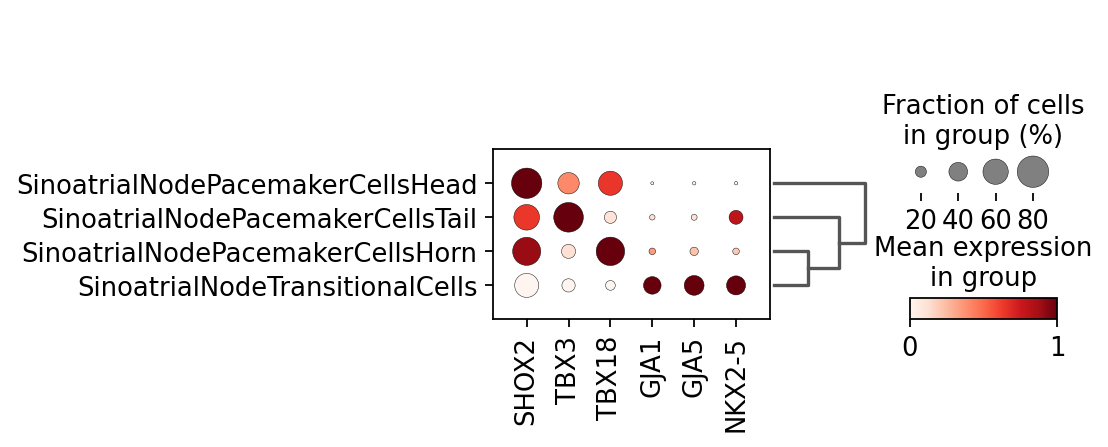

In [84]:
# celltypist based annotation
conf_score_thresh = 0.6

transitional_obsnames = list(adata_sc_sel.obs_names[adata_sc_sel.obs['SANPC_subpopulations']=='SinoatrialNodeTransitionalCells'])
for key in features.keys():
    ad = adata_sc_sel.copy()
    ad.obs['tmp_annotation'] = ad.obs[f'celltypist_prediction_{key}'].astype('str').copy()
    ad.obs.loc[transitional_obsnames, 'tmp_annotation'] = 'SinoatrialNodeTransitionalCells'
    # remove low confidence cells
    ad = ad[ad.obs[f'celltypist_conf_score_{key}']>conf_score_thresh]
    print(key)
    print(ad.obs['tmp_annotation'].value_counts())
    sc.pl.dotplot(ad,
                  var_names=genes,
                  groupby='tmp_annotation',
                  standard_scale='var',
                  dendrogram=True,
                 )

--> CellTypist, All gene is slightly better than clustering --> will go with CellTypist

# Annotate

In [85]:
conf_score_thresh = 0.6
key = 'all'

In [87]:
transitional_obsnames = list(adata_sc.obs_names[adata_sc.obs['SANPC_subpopulations']=='SinoatrialNodeTransitionalCells'])
cyclingcell_obsnames = list(adata_sc.obs_names[adata_sc.obs['SANPC_subpopulations']=='SinoatrialNodePacemakerCellsCycling'])
low_conf_obsnames = list(adata_sc.obs_names[adata_sc.obs[f'celltypist_conf_score_{key}']<conf_score_thresh])

adata_sc.obs['SANPC_subpopulations'] = adata_sc.obs[f'celltypist_prediction_{key}'].astype('str').copy()
adata_sc.obs.loc[low_conf_obsnames,'SANPC_subpopulations'] = 'SinoatrialNodePacemakerCells_celltypist-low-confidence'
adata_sc.obs.loc[transitional_obsnames,'SANPC_subpopulations'] = 'SinoatrialNodeTransitionalCells'
adata_sc.obs.loc[cyclingcell_obsnames,'SANPC_subpopulations'] = 'SinoatrialNodePacemakerCellsCycling'
adata_sc.obs['SANPC_subpopulations'].value_counts()

SANPC_subpopulations
SinoatrialNodePacemakerCellsHead                          405
SinoatrialNodeTransitionalCells                           209
SinoatrialNodePacemakerCellsTail                           93
SinoatrialNodePacemakerCellsHorn                           52
SinoatrialNodePacemakerCellsCycling                        44
SinoatrialNodePacemakerCells_celltypist-low-confidence     30
Name: count, dtype: int64

... storing 'SANPC_subpopulations' as categorical


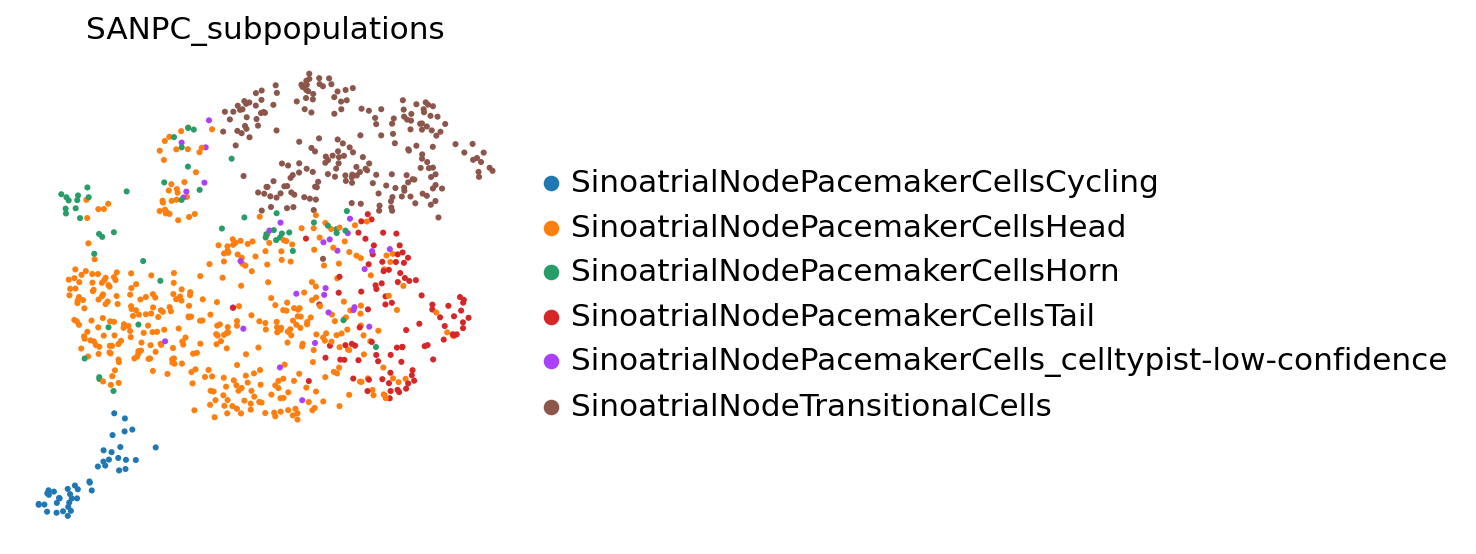

In [88]:
sc.pl.embedding(adata_sc, basis='umap',
                        color=['SANPC_subpopulations'],
                   size=30, wspace=0.4, frameon=False,legend_fontsize=14)

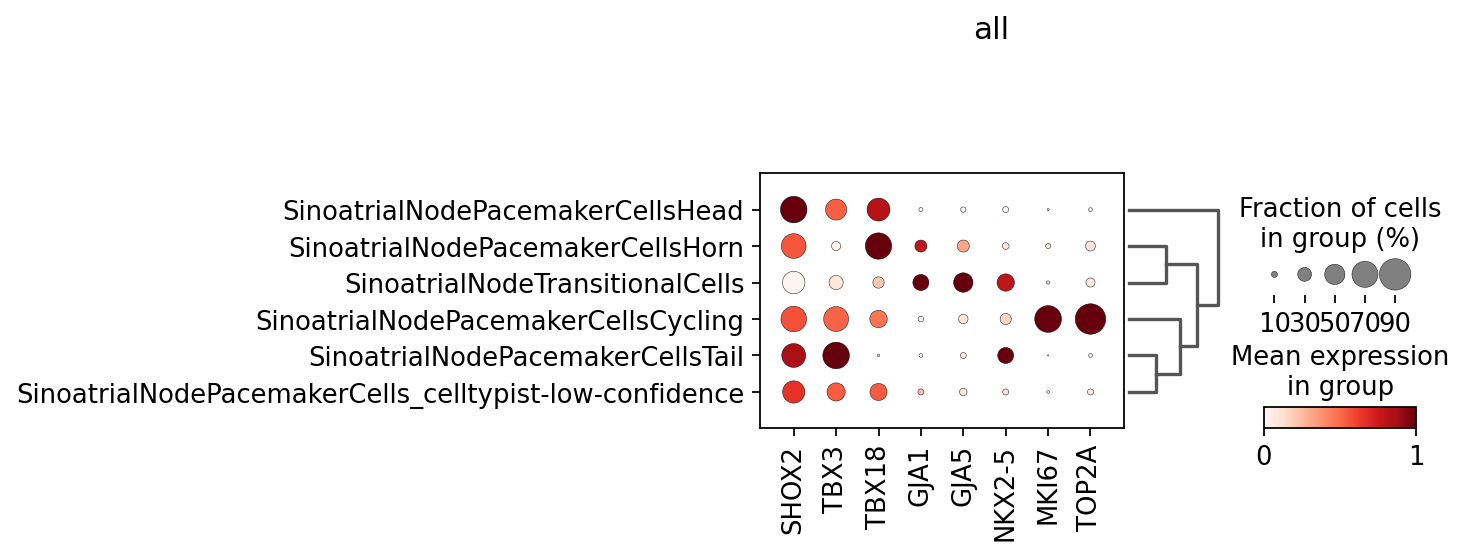

In [92]:
# markers for assessing
genes = ['SHOX2',
    'TBX3','TBX18',
         'GJA1', # CX43
         'GJA5', # CX40
         'NKX2-5',# 'NPPA'
         'MKI67','TOP2A'
        ]
genes = [x for x in genes if x in adata_sc.var_names]

sc.pl.dotplot(adata_sc,
                  var_names=genes,
                  groupby='SANPC_subpopulations',
                  standard_scale='var',
                  dendrogram=True,
                  title=key
                 )

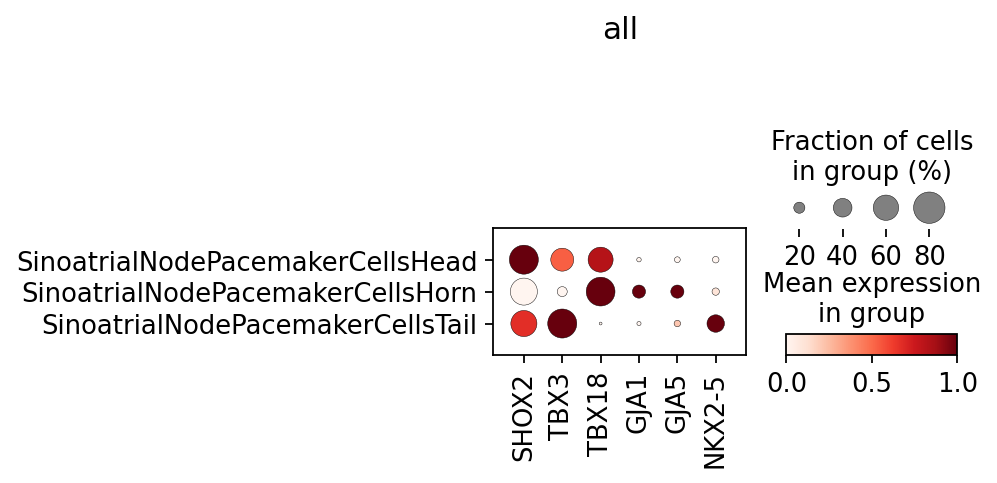

In [95]:
# without cycling and transitional cells
genes = ['SHOX2',
    'TBX3','TBX18',
         'GJA1', # CX43
         'GJA5', # CX40
         'NKX2-5',# 'NPPA'
        ]
genes = [x for x in genes if x in adata_sc.var_names]

sc.pl.dotplot(adata_sc[adata_sc.obs['SANPC_subpopulations'].isin(['SinoatrialNodePacemakerCellsCycling','SinoatrialNodeTransitionalCells','SinoatrialNodePacemakerCells_celltypist-low-confidence'])==False],
                  var_names=genes,
                  groupby='SANPC_subpopulations',
                  standard_scale='var',
                  dendrogram=False,
                  title=key
                 )

# Save

In [99]:
# read in original raw data again
adata_sc_all = sc.read_h5ad('/nfs/team205/heart/anndata_objects/Foetal/Feb28ObjectRaw_finegrain_updated.h5ad')

In [102]:
# subset multiome and sanpc data
adata_sc_sanpc_multiome = adata_sc_all[adata_sc_all.obs['kit_10x']=='Multiome-v1']
adata_sc_sanpc_multiome = adata_sc_sanpc_multiome[adata_sc_sanpc_multiome.obs['fine_grain']=='SinoatrialNodePacemakerCells']
adata_sc_sanpc_multiome

View of AnnData object with n_obs × n_vars = 833 × 36601
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'region', 'age', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'donor_by_library-prep', 'multiplexed', 'SOC | status', 'SOC | log_prob_singleton', 'SOC | log_prob_doublet', 'batch_key', '_scvi_batch', 'FACSgate', 'fine_grain', 'mid_grain', 'coarse_grain', 'sex', 'week', 'trimester', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', '_scvi_labels', 'stress_score', 'hb1_score'
    var: 'gene_name_scRNA-0', 'gene_id'
    uns: 'FACSgate_colors', '_scvi_manager_uuid', '_scvi_uuid', 'age_colors', 'cell_or

In [106]:
# copy the labels
adata_sc_sanpc_multiome.obs['SANPC_subpopulations'] = adata_sc.obs['SANPC_subpopulations'].reindex(adata_sc_sanpc_multiome.obs_names)
adata_sc_sanpc_multiome.obs['SANPC_subpopulations'].value_counts()

SANPC_subpopulations
SinoatrialNodePacemakerCellsHead                          405
SinoatrialNodeTransitionalCells                           209
SinoatrialNodePacemakerCellsTail                           93
SinoatrialNodePacemakerCellsHorn                           52
SinoatrialNodePacemakerCellsCycling                        44
SinoatrialNodePacemakerCells_celltypist-low-confidence     30
Name: count, dtype: int64

In [107]:
adata_sc_sanpc_multiome.write('/nfs/team205/heart/anndata_objects/Foetal/Feb28ObjectRaw_finegrain_updated_SANPC.h5ad')
print(adata_sc_sanpc_multiome.X.data[:5])

[3. 1. 1. 4. 1.]


In [108]:
adata_sc_sanpc_multiome

AnnData object with n_obs × n_vars = 833 × 36601
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'region', 'age', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'donor_by_library-prep', 'multiplexed', 'SOC | status', 'SOC | log_prob_singleton', 'SOC | log_prob_doublet', 'batch_key', '_scvi_batch', 'FACSgate', 'fine_grain', 'mid_grain', 'coarse_grain', 'sex', 'week', 'trimester', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', '_scvi_labels', 'stress_score', 'hb1_score', 'SANPC_subpopulations'
    var: 'gene_name_scRNA-0', 'gene_id'
    uns: 'FACSgate_colors', '_scvi_manager_uuid', '_scvi_uuid', 'age_c